In [21]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from cycler import cycler
import plotly.graph_objects as go
import plotly.express as px

from sklearn.preprocessing import LabelEncoder

%matplotlib inline

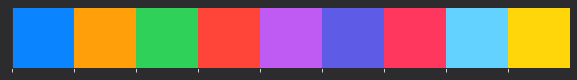

In [25]:
raw_dark_palette = [
    (10, 132, 255), # Blue
    (255, 159, 10), # Orange
    (48, 209, 88),  # Green
    (255, 69, 58),  # Red
    (191, 90, 242), # Purple
    (94, 92, 230),  # Indigo
    (255, 55, 95),  # Pink
    (100, 210, 255),# Teal
    (255, 214, 10)  # Yellow
]
raw_darks=[
    (44, 44, 46)
]
raw_lights=[
    (229, 229, 234)
]
miscellaneous={
    'blue':'#0f71d4',
    'green':'#14b827',
    'red':'#cf0c0c'
}

dark_palette=np.array(raw_dark_palette)/255
darks=np.array(raw_darks)/255
lights=np.array(raw_lights)/255

#rcparams
dark_color=darks[-1]
light_color=lights[-1]

mpl.rcParams['axes.prop_cycle']=cycler('color',dark_palette)
mpl.rcParams['figure.facecolor']=dark_color
mpl.rcParams['figure.edgecolor']=dark_color
mpl.rcParams['axes.facecolor']=dark_color
mpl.rcParams['text.color']=light_color
mpl.rcParams['axes.labelcolor']=light_color
mpl.rcParams['axes.edgecolor']=dark_color
mpl.rcParams['xtick.color']=light_color
mpl.rcParams['ytick.color']=light_color
mpl.rcParams['figure.dpi']=80
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False

sns.palplot(dark_palette)

In [11]:
train=pd.read_csv('data/train.csv')
test=pd.read_csv('data/test.csv')
train.head()

id  feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
0   0          0          0          1          0          1          0   
1   1          0          0          0          0          2          1   
2   2          0          0          0          0          0          0   
3   3          0          0          0          0          0          0   
4   4          0          0          0          0          0          0   

   feature_6  feature_7  feature_8  ...  feature_41  feature_42  feature_43  \
0          0          0          0  ...           0           0          21   
1          0          0          0  ...           0           0           0   
2          0          0          0  ...           0           1           0   
3          0          3          0  ...           0           0           0   
4          0          0          0  ...           0           0           0   

   feature_44  feature_45  feature_46  feature_47  feature_48  feature_49  \
0           0           0           0           0           0           0   
1           0           0           0           0           0           0   
2           0           0           0          13           2           0   
3           0           0           0           0           1           0   
4           0           0           0           0           1           0   

    target  
0  Class_2  
1  Class_1  
2  Class_1  
3  Class_4  
4  Class_2  

[5 rows x 52 columns]

In [4]:
train=pd.read_csv('data/train.csv')
test=pd.read_csv('data/test.csv')
train.head()

id  feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
0   0          0          0          1          0          1          0   
1   1          0          0          0          0          2          1   
2   2          0          0          0          0          0          0   
3   3          0          0          0          0          0          0   
4   4          0          0          0          0          0          0   

   feature_6  feature_7  feature_8  ...  feature_41  feature_42  feature_43  \
0          0          0          0  ...           0           0          21   
1          0          0          0  ...           0           0           0   
2          0          0          0  ...           0           1           0   
3          0          3          0  ...           0           0           0   
4          0          0          0  ...           0           0           0   

   feature_44  feature_45  feature_46  feature_47  feature_48  feature_49  \
0           0           0           0           0           0           0   
1           0           0           0           0           0           0   
2           0           0           0          13           2           0   
3           0           0           0           0           1           0   
4           0           0           0           0           1           0   

    target  
0  Class_2  
1  Class_1  
2  Class_1  
3  Class_4  
4  Class_2  

[5 rows x 52 columns]

In [5]:
train=train.drop('id',axis=1)
test=test.drop('id',axis=1)

### Now we take a look at the stats of the data

In [5]:
train.describe().T.style.bar(subset=['mean'],color=miscellaneous['blue']).background_gradient(subset=['std'],cmap='Reds').background_gradient(subset=['50%'],cmap='coolwarm')

In [6]:
test.describe().T.style.bar(subset=['mean'],color=miscellaneous['blue']).background_gradient(subset=['std'],cmap='Reds').background_gradient(subset=['50%'],cmap='coolwarm')

## Observations
It can be seen from the above tables that for a majority of features the median is zero. For the test data the range for some features may be different.

In [7]:
def change_color(x):
    if x<0:
        color='red'
    elif x>0:
        color='green'
    else:
        color='white'
    return f'color:{color}'

(train.describe()-test.describe())[test.columns].T.iloc[:,1:].style.bar(subset=['mean','std'],align='mid',color=[miscellaneous['red'],miscellaneous['green']]).applymap(change_color,['min','max'])

As can be seen the test and train data are very similar. Only some difference in their ranges.

In [13]:
labels=sorted(train.target.unique())
values=train.groupby('target').size()

fig=px.pie(train,names='target',hole=.8,title='Class Distribution')
fig.show()

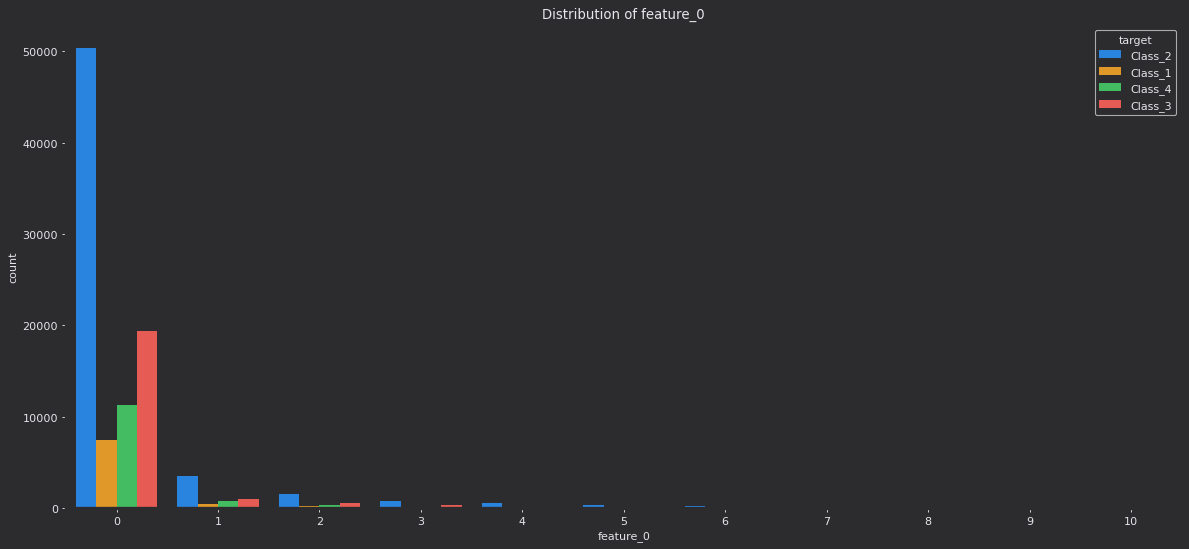

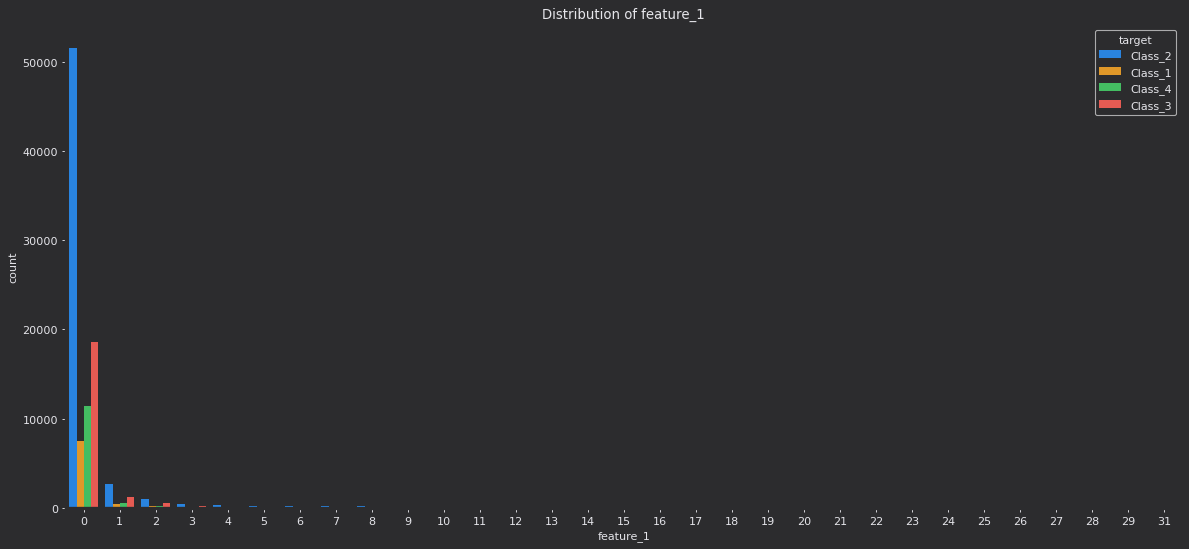

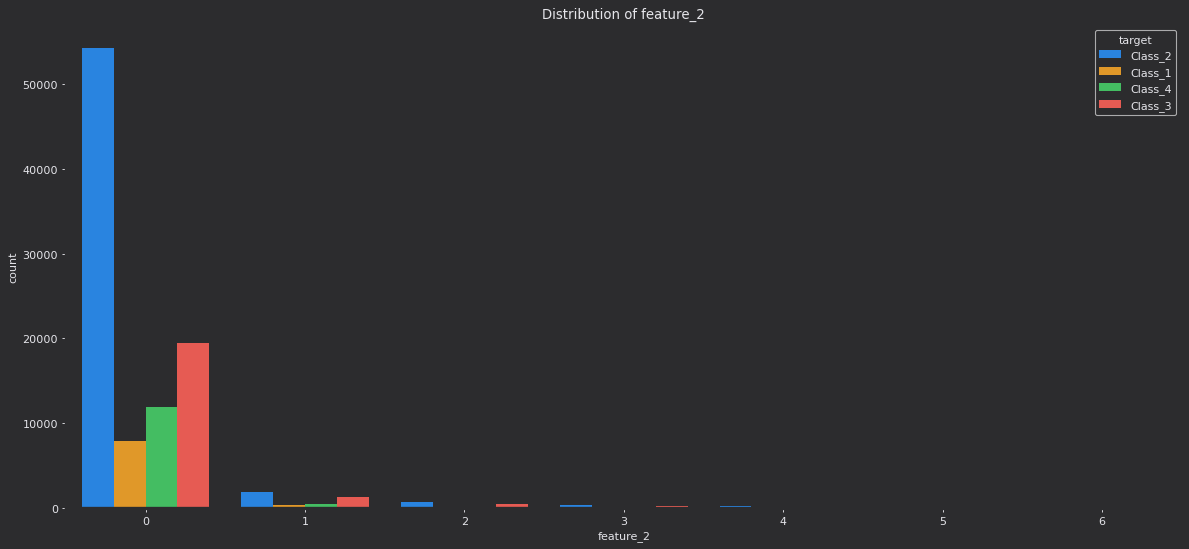

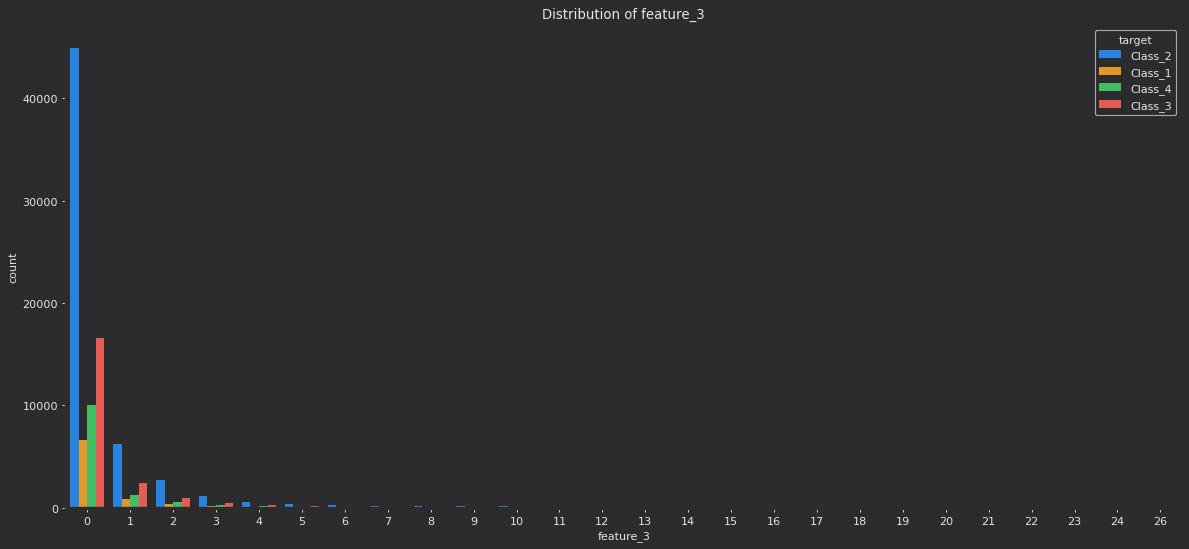

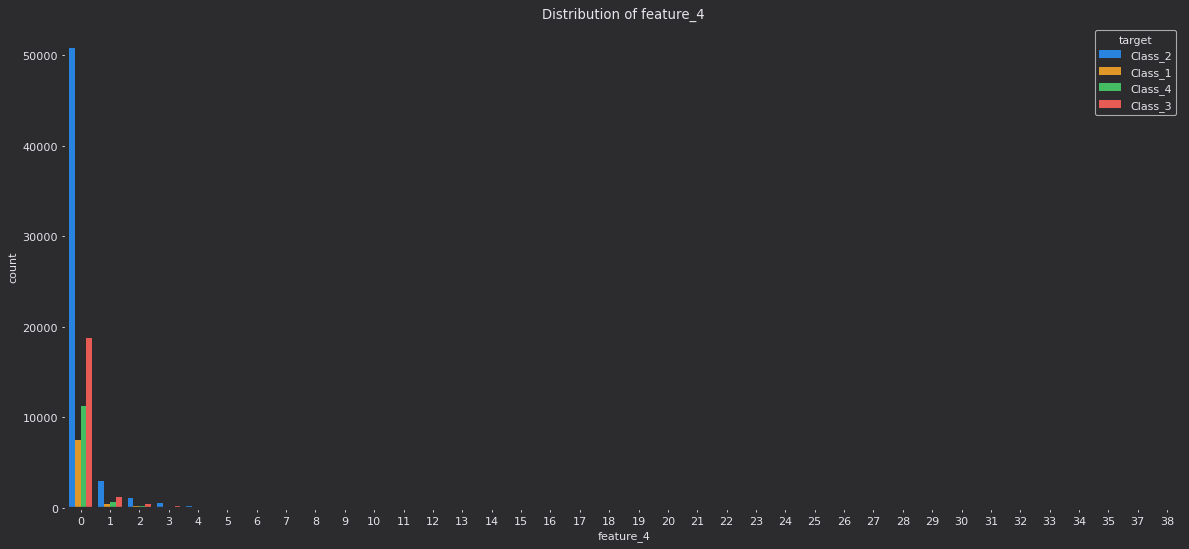

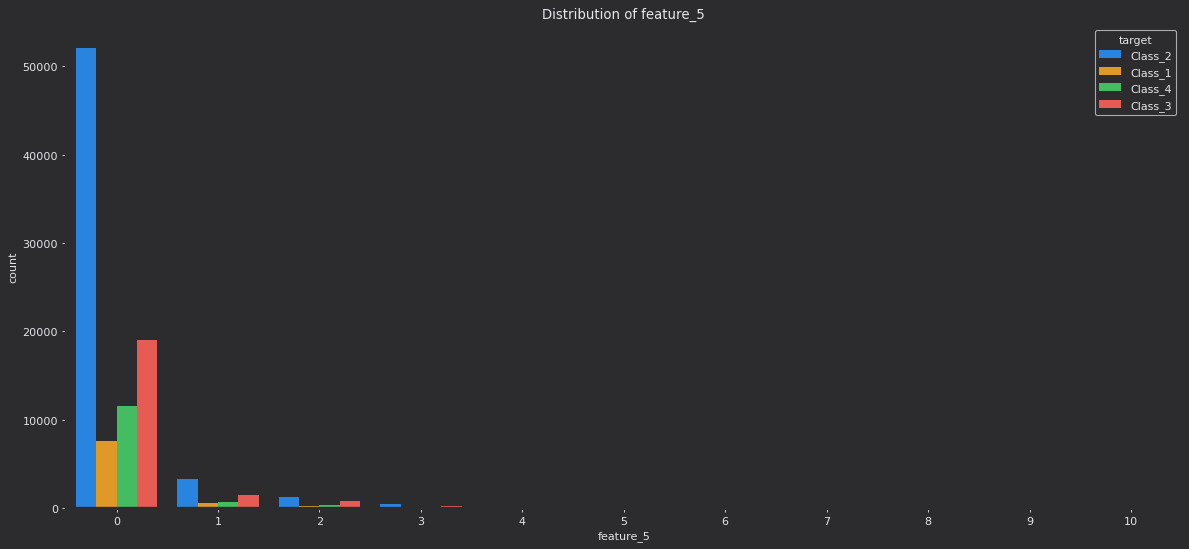

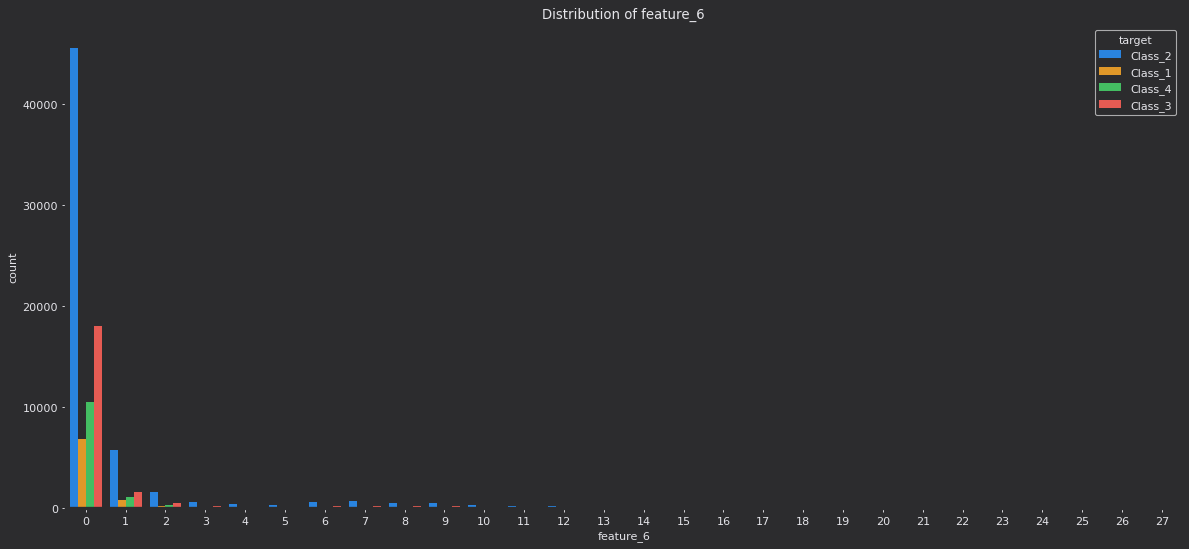

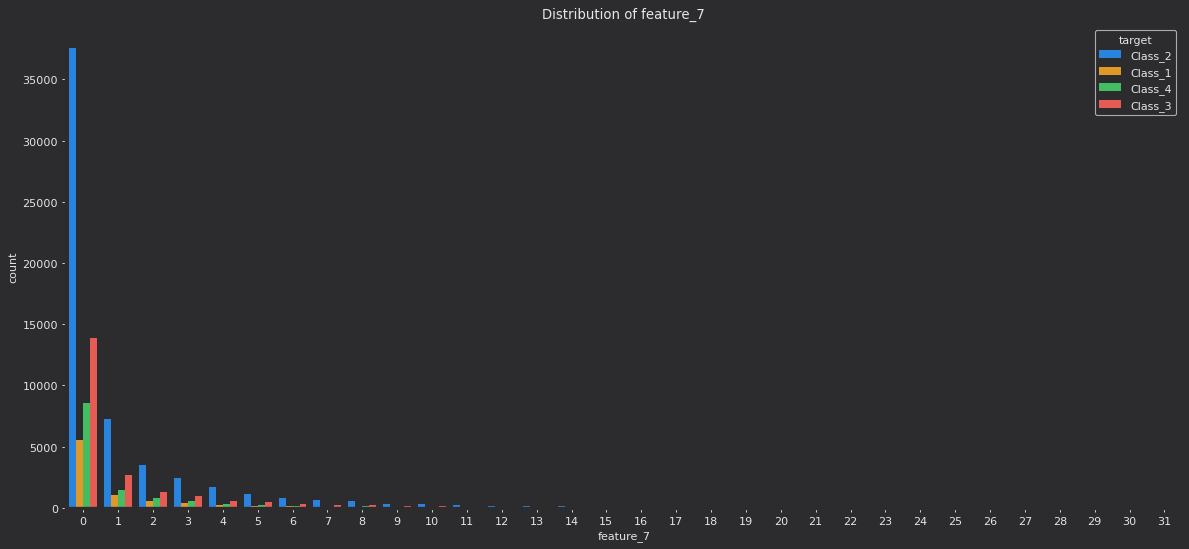

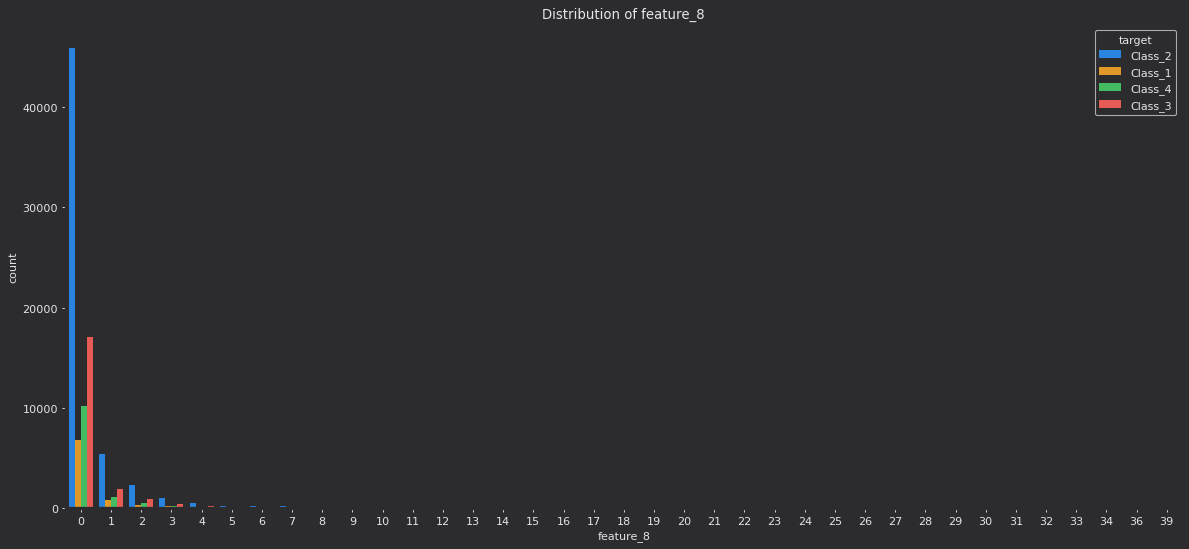

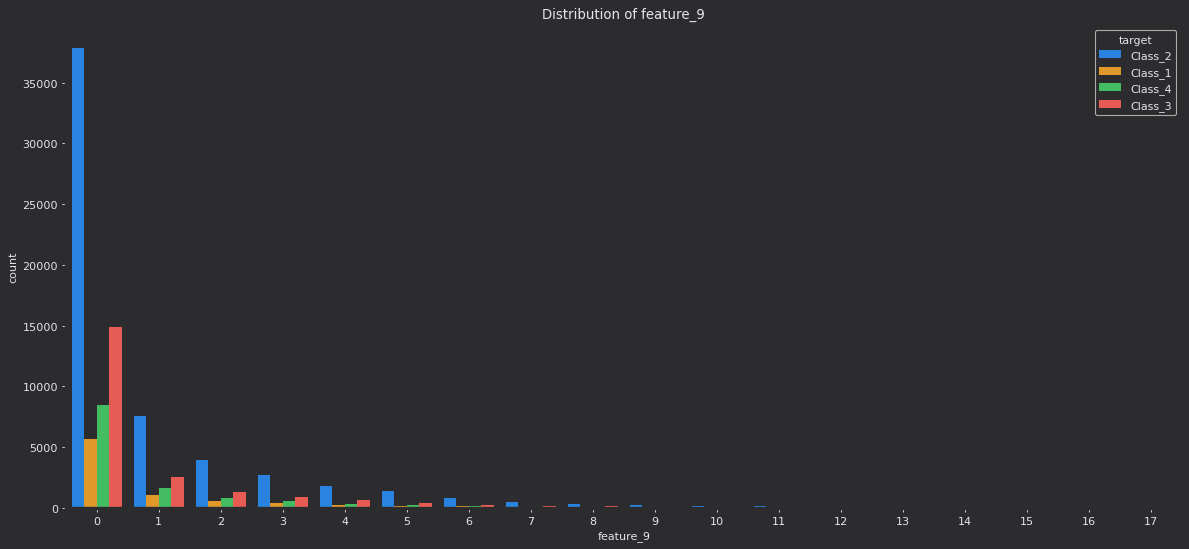

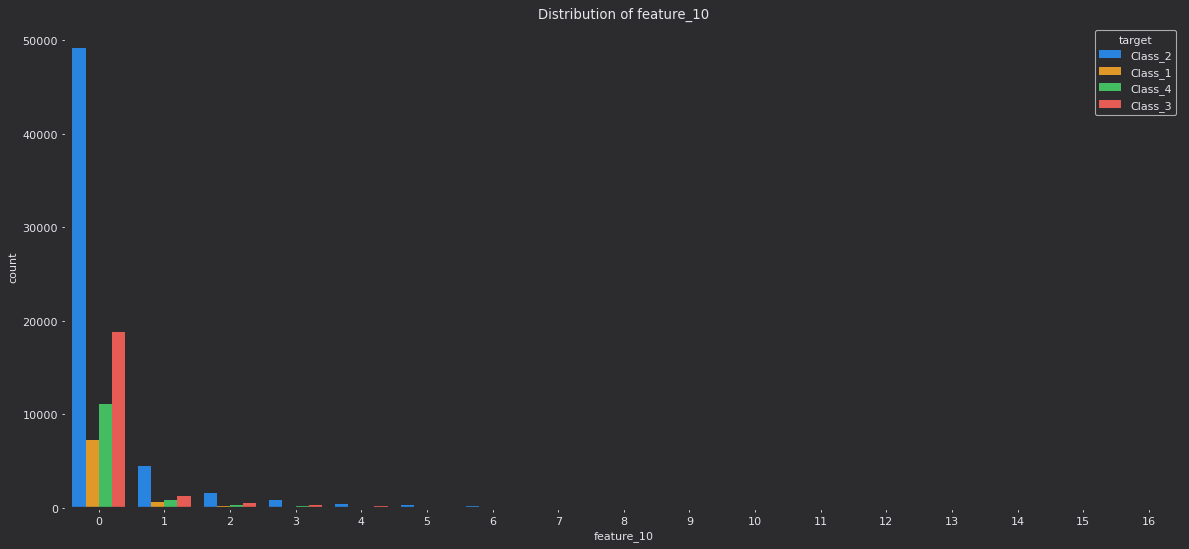

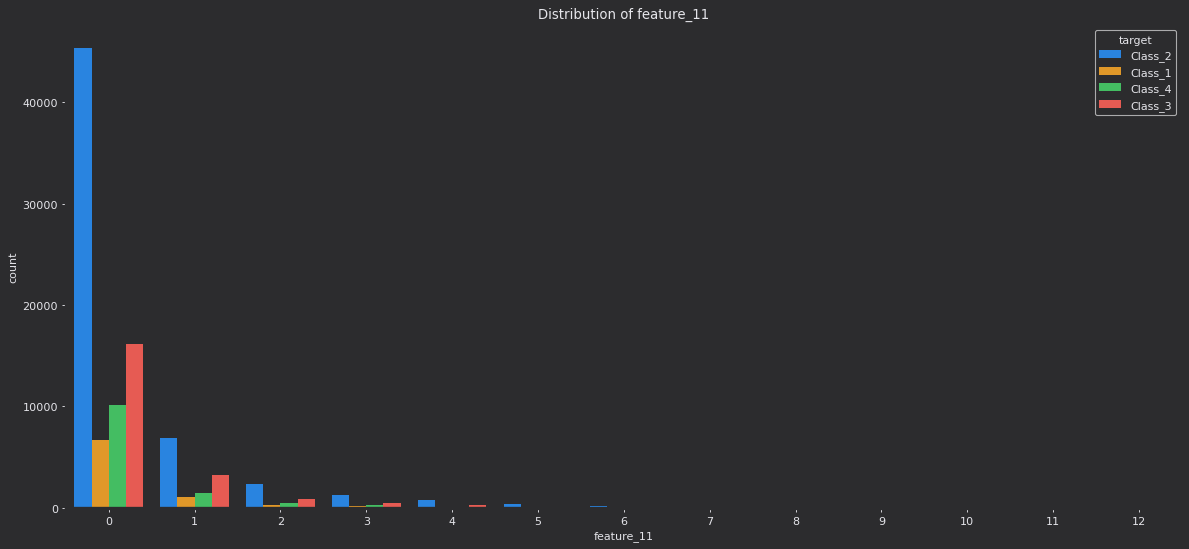

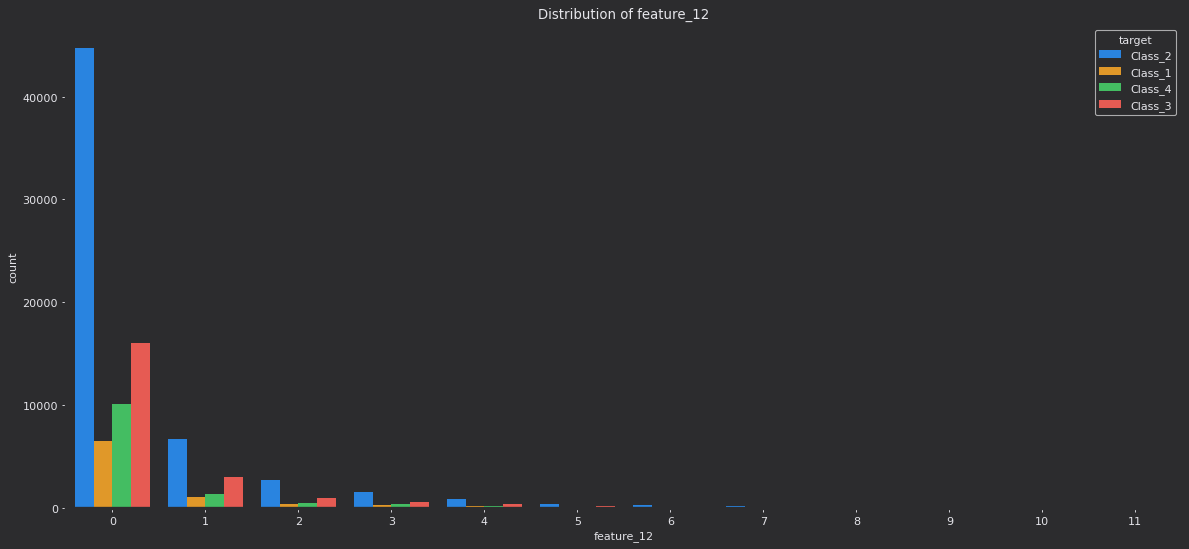

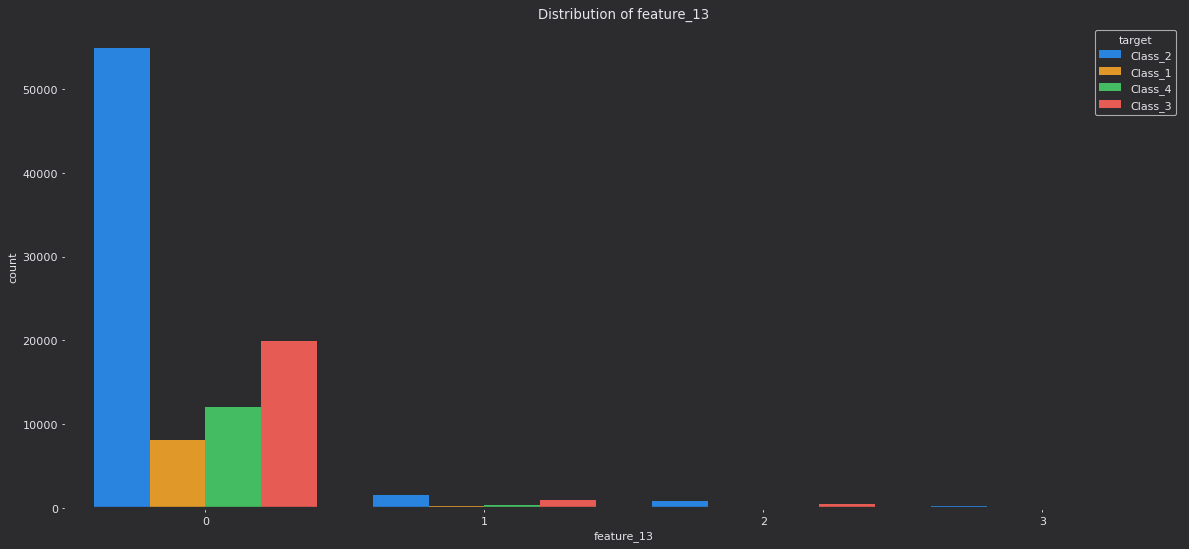

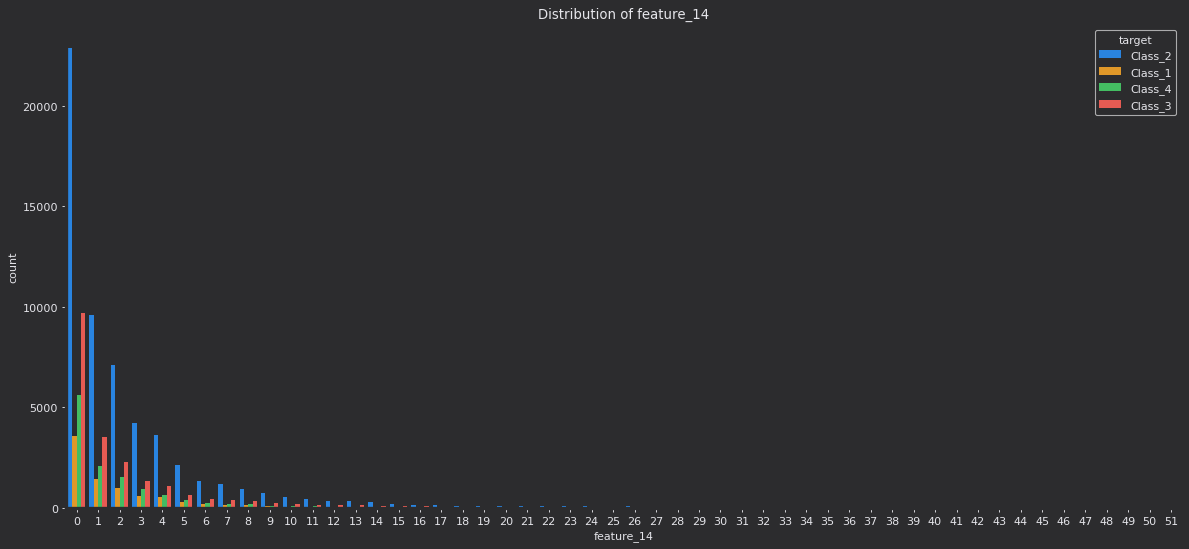

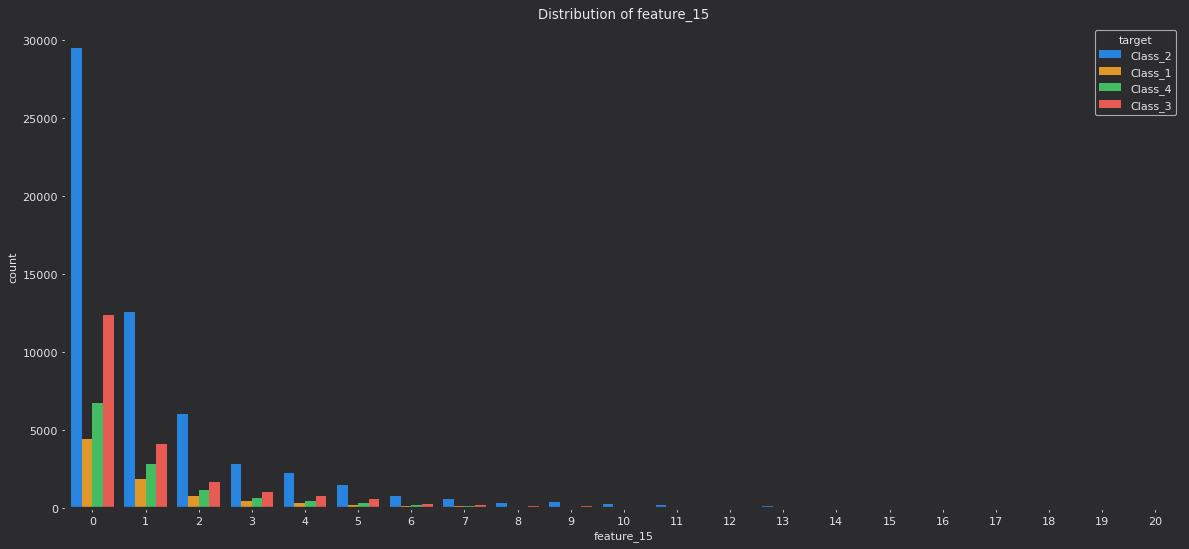

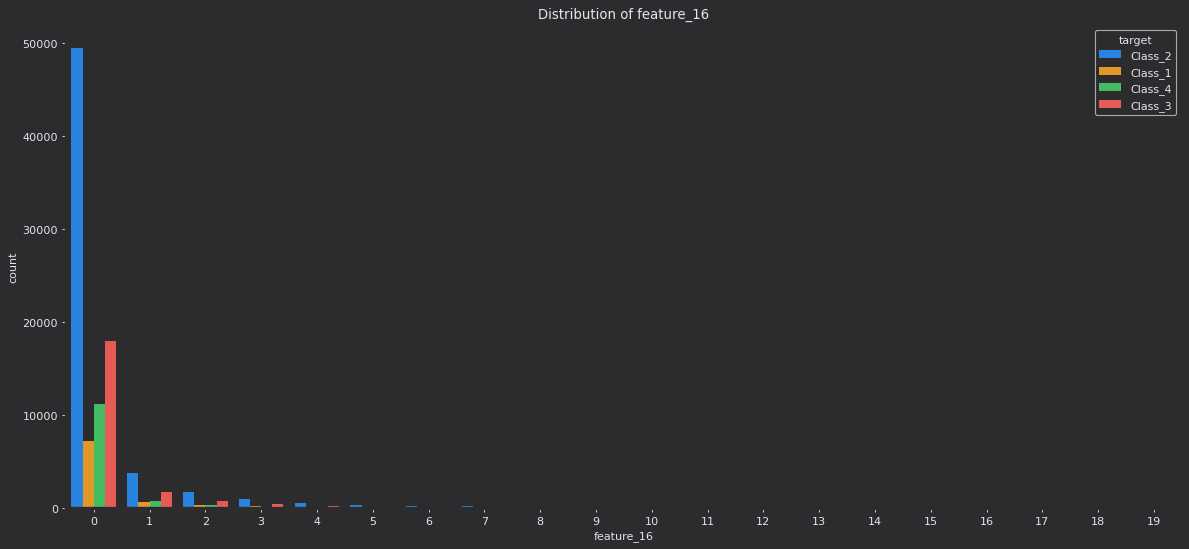

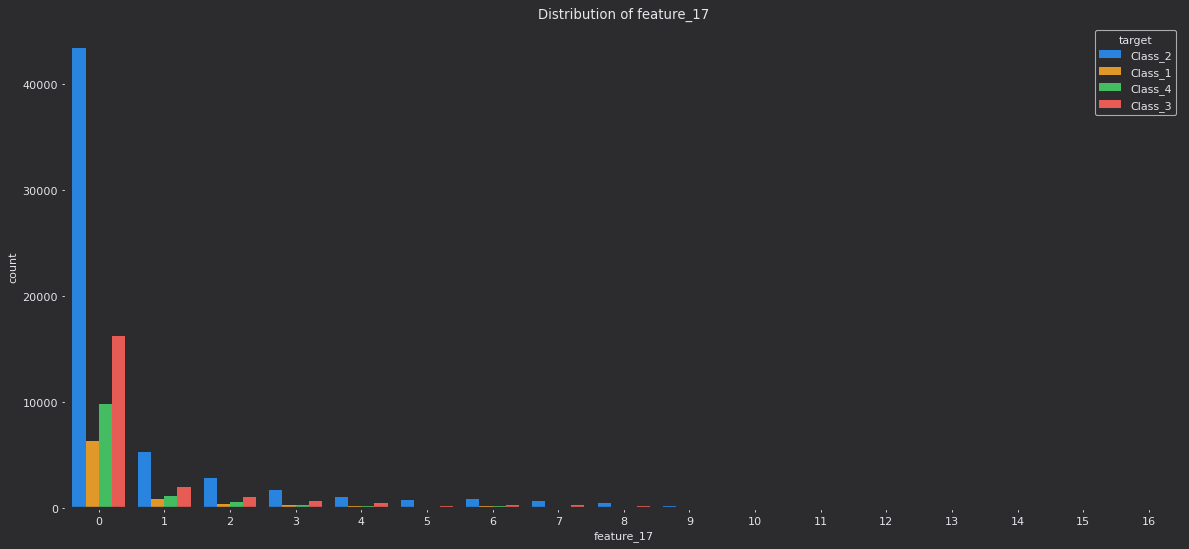

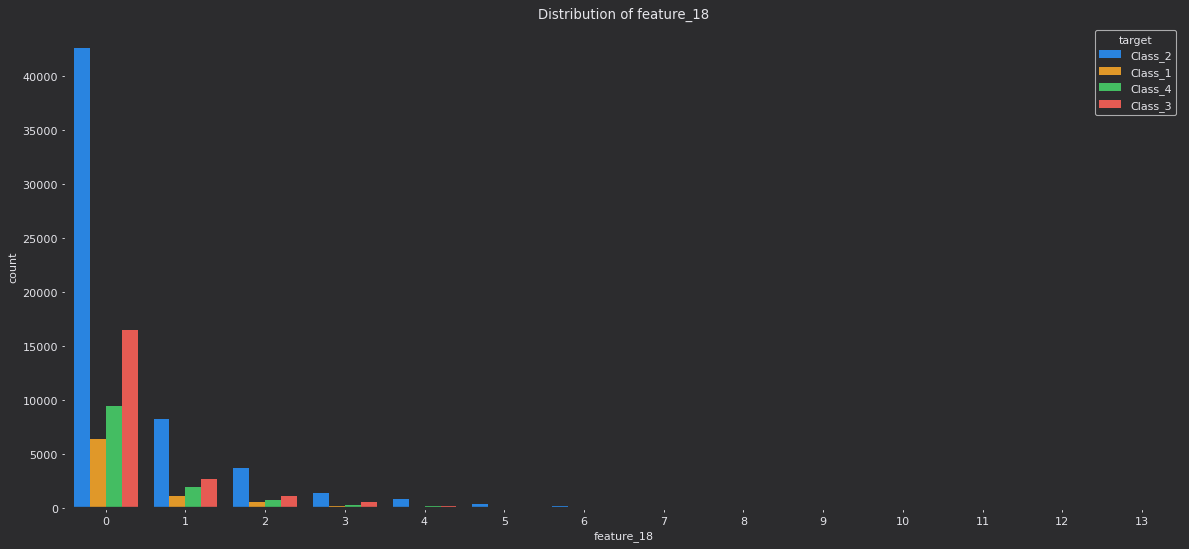

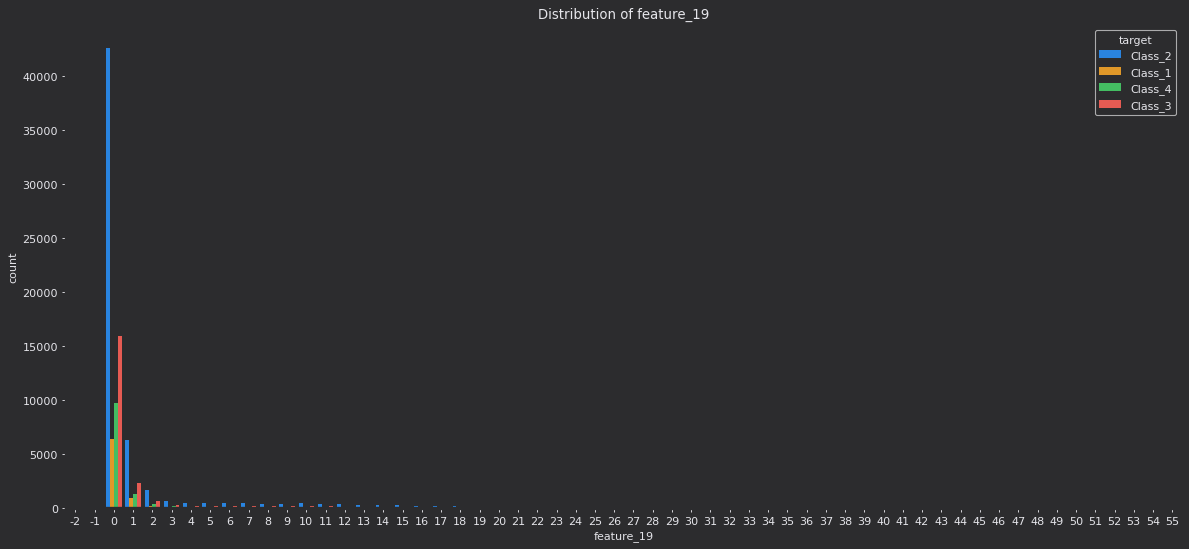

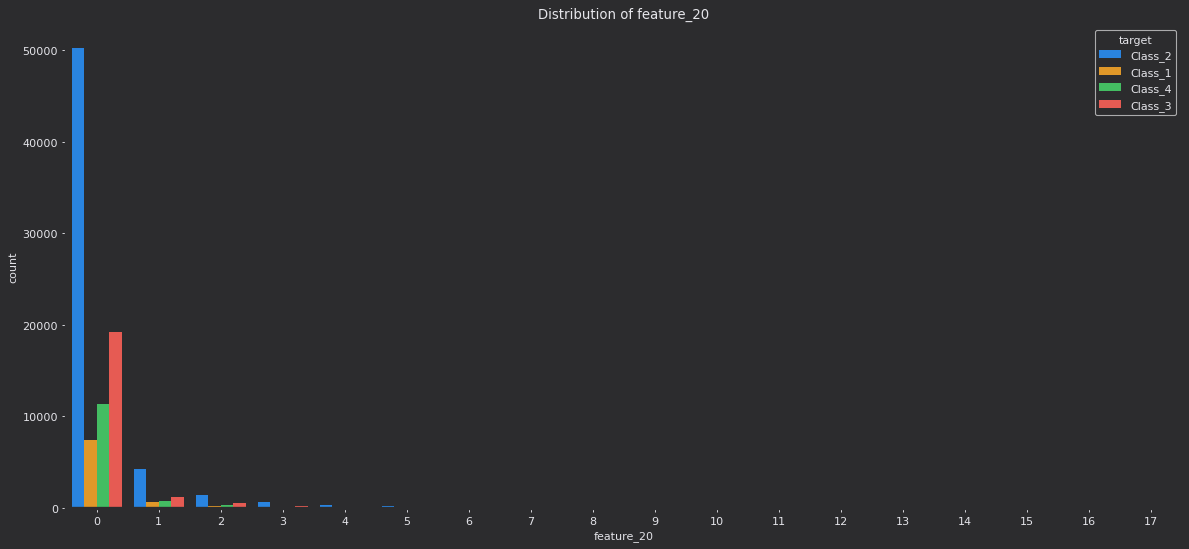

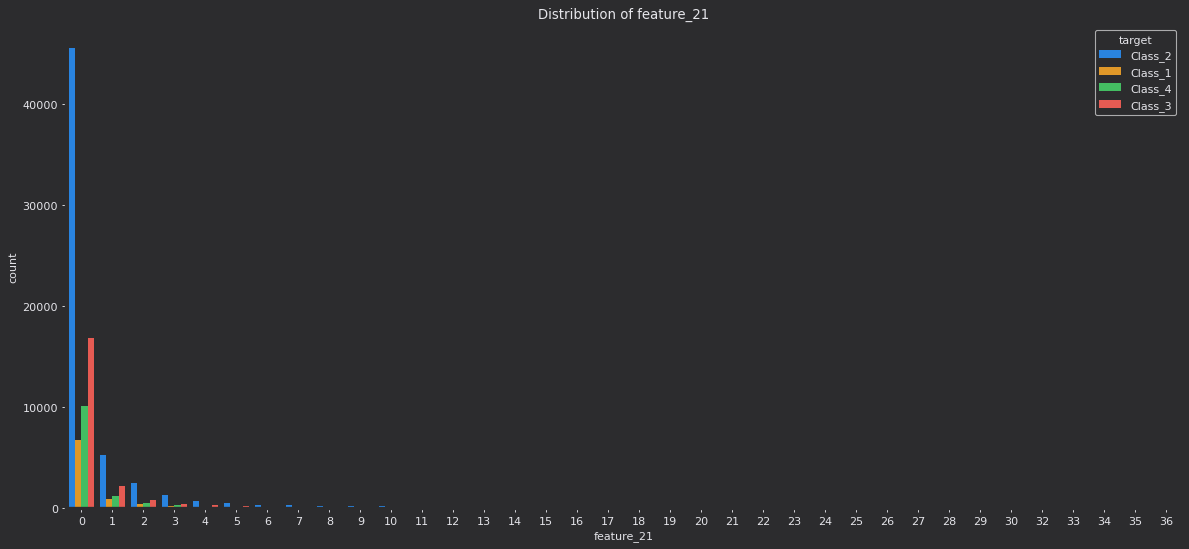

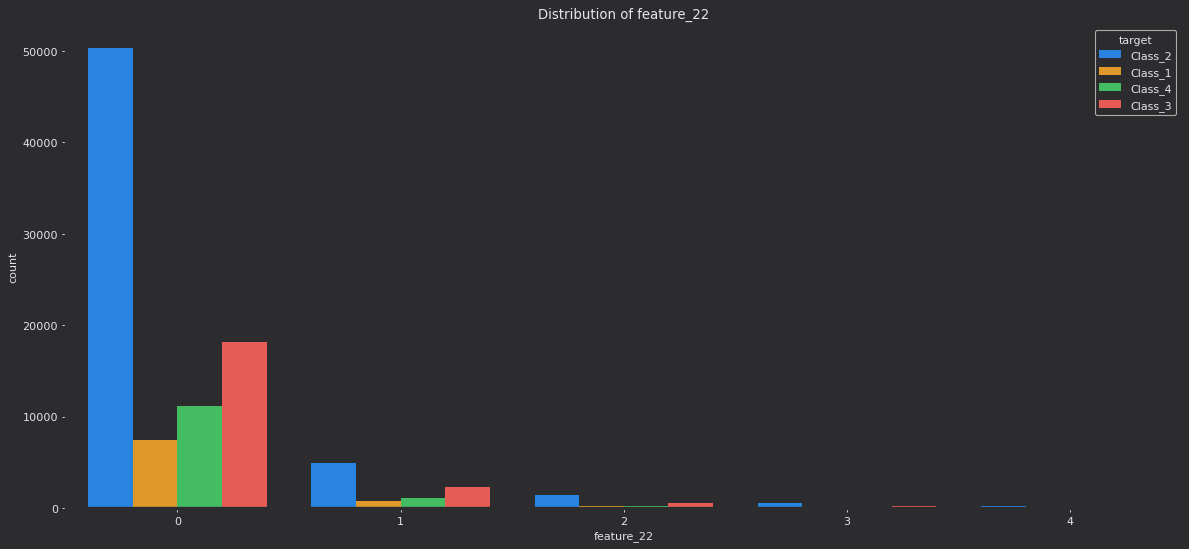

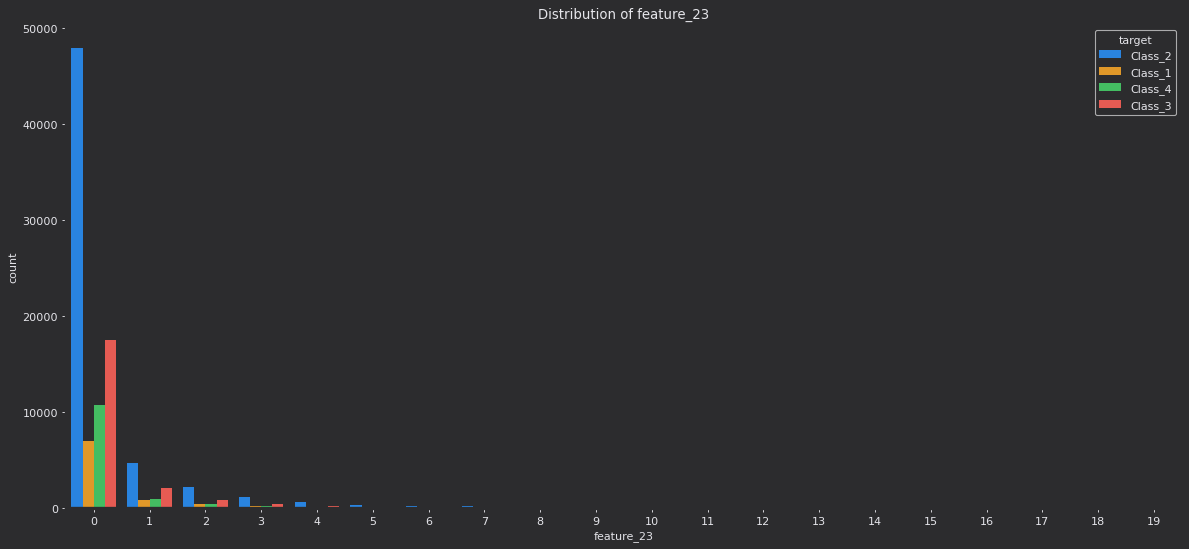

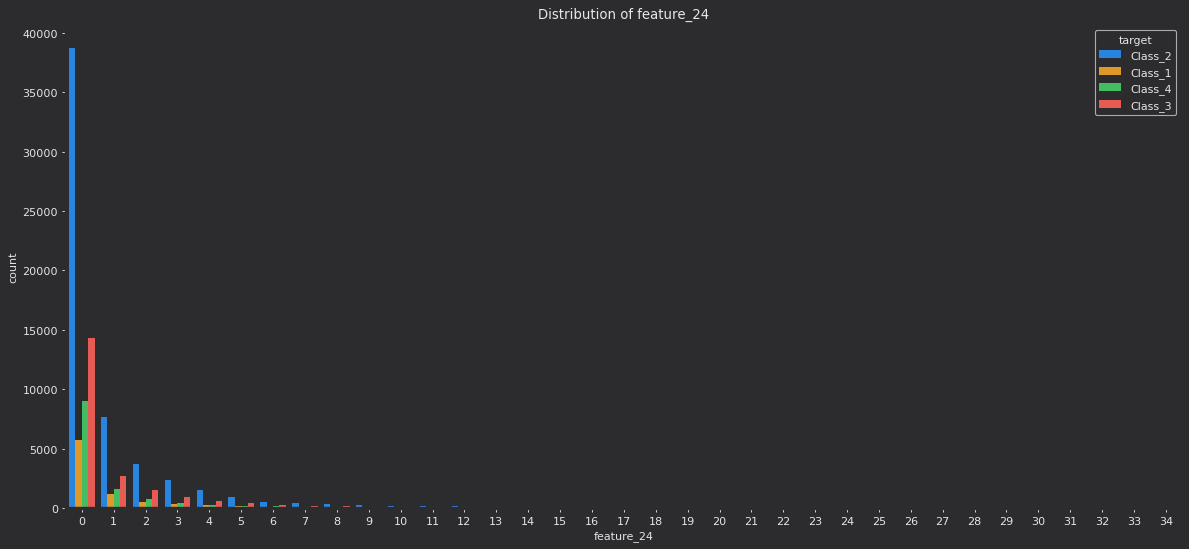

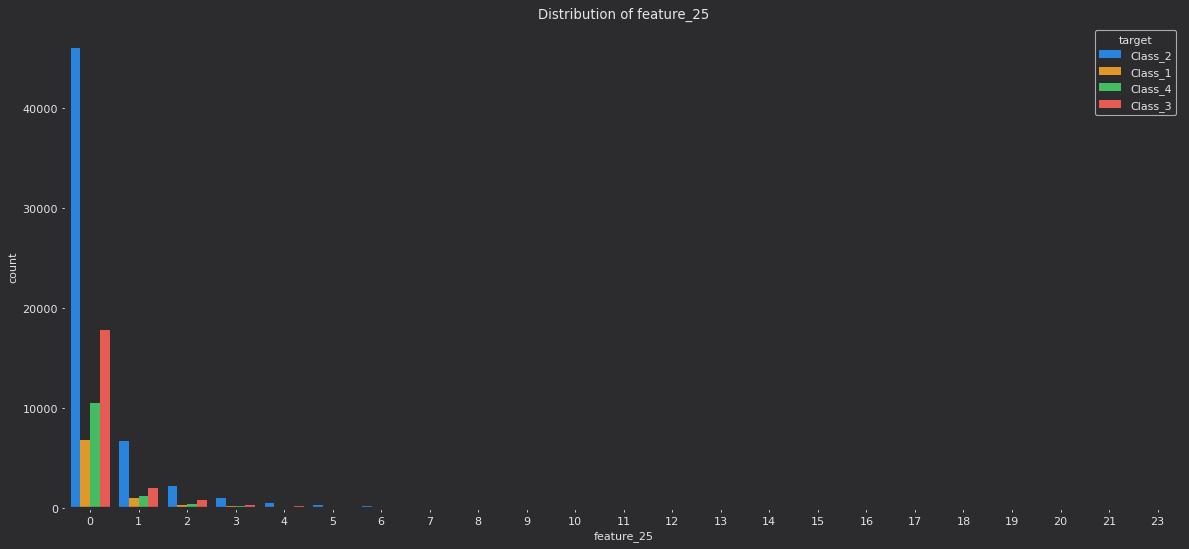

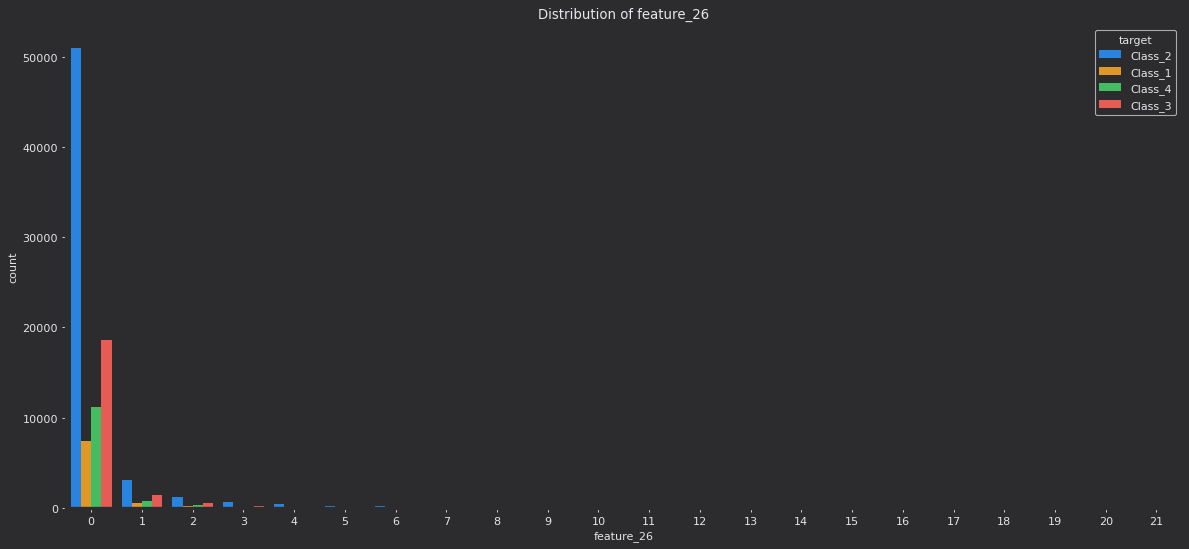

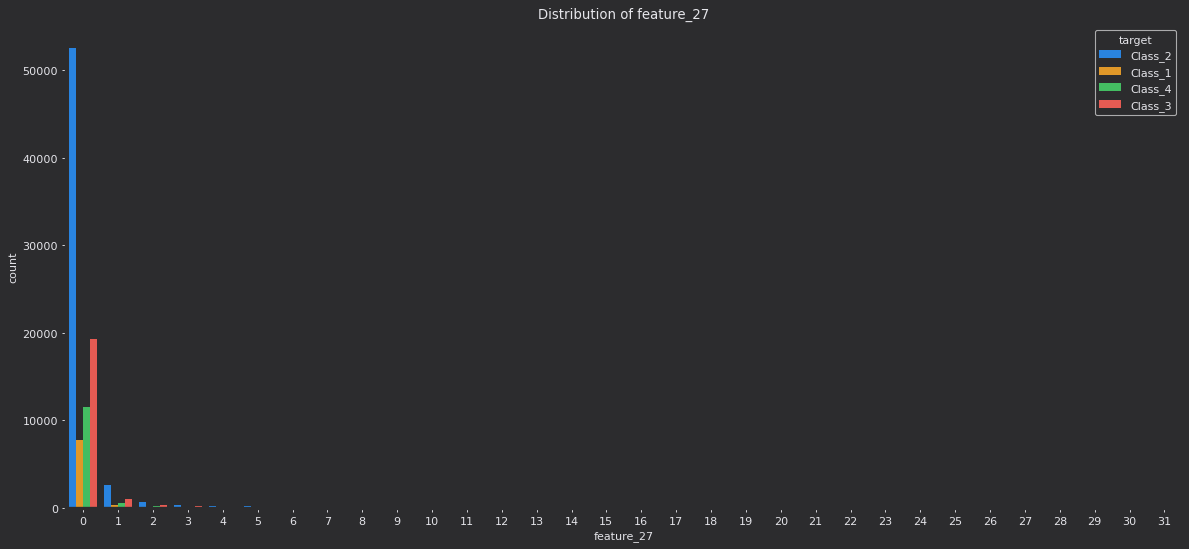

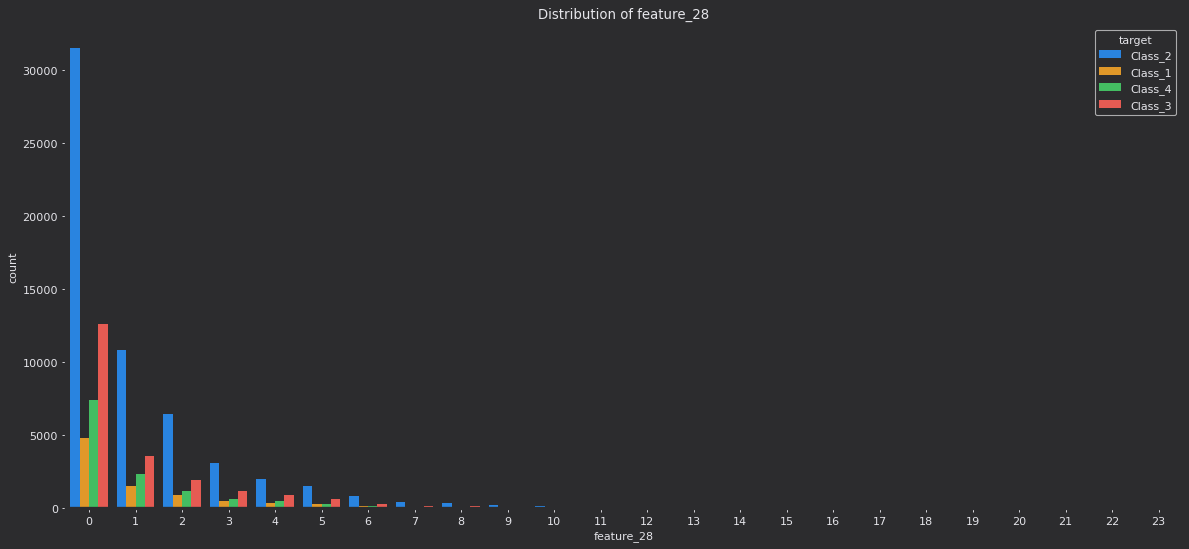

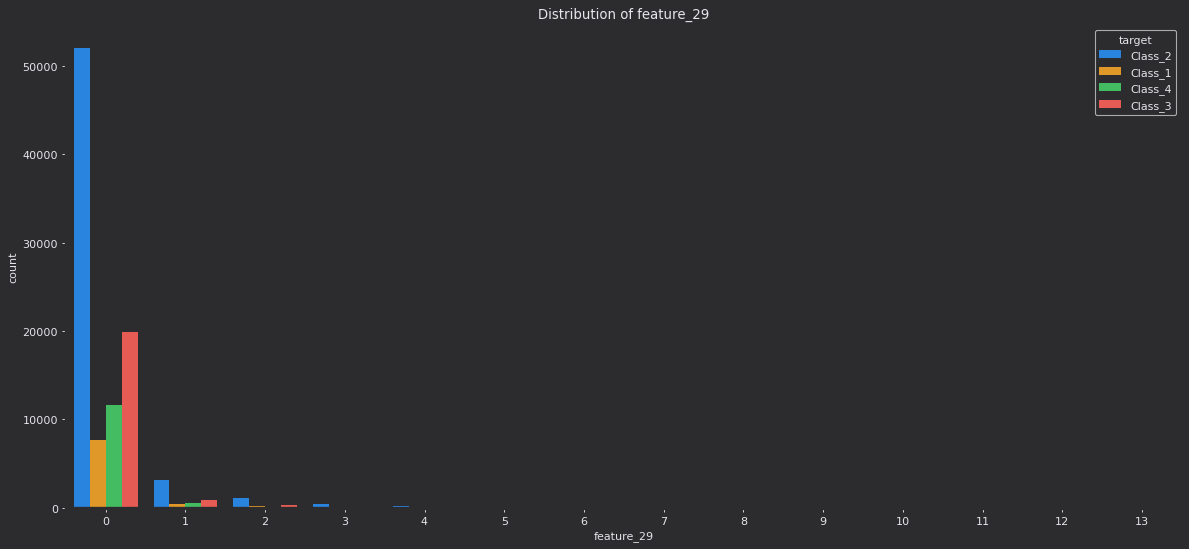

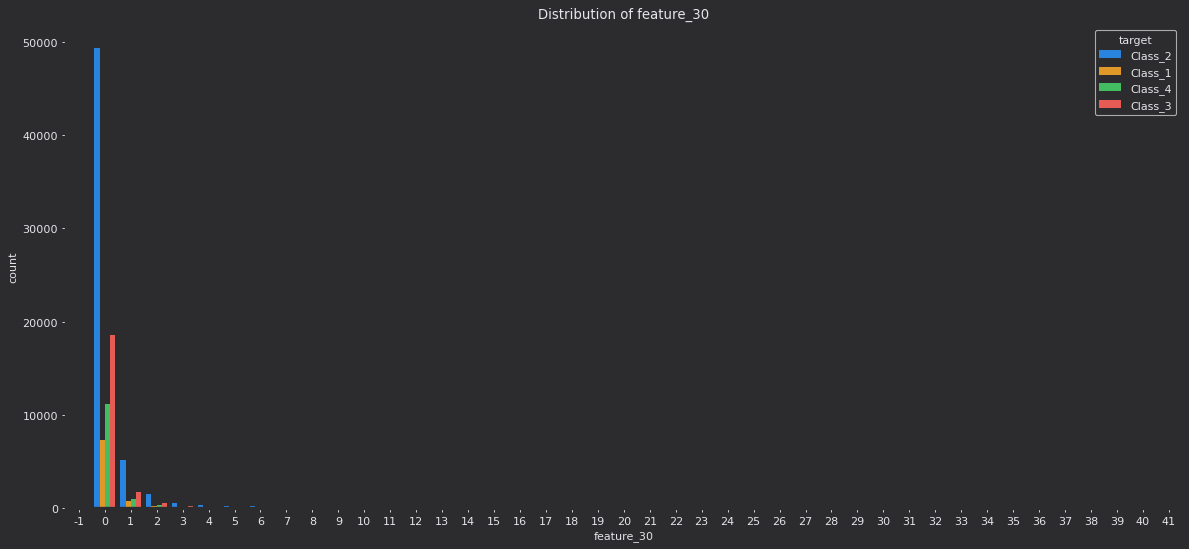

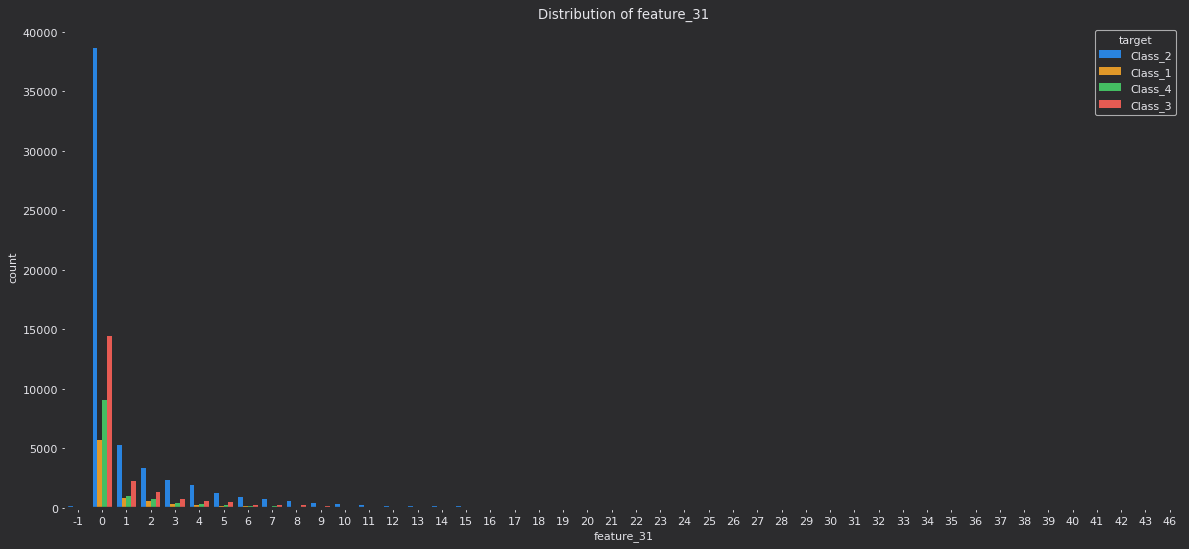

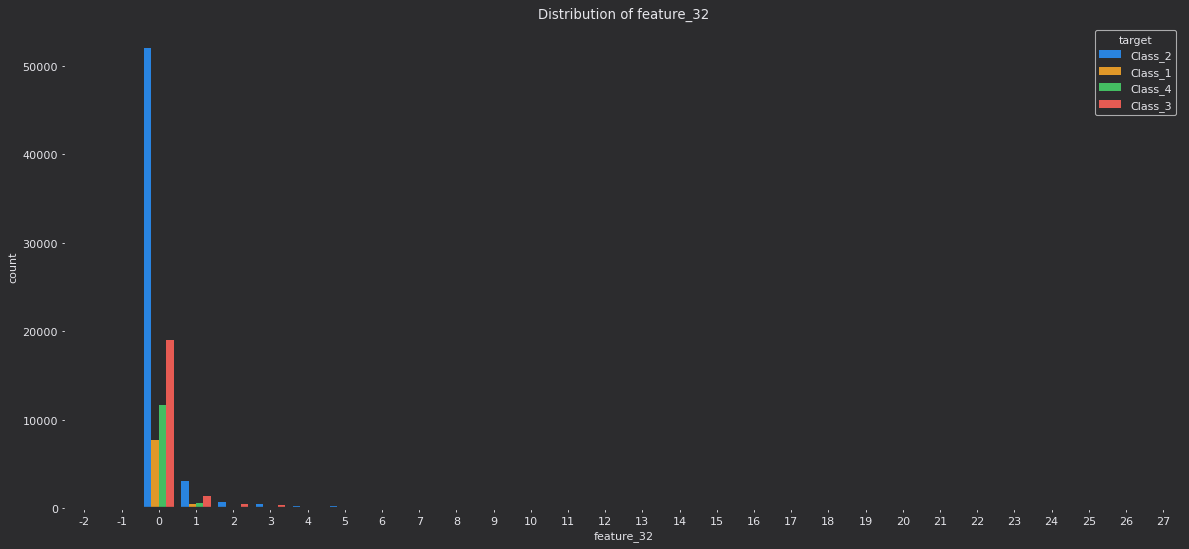

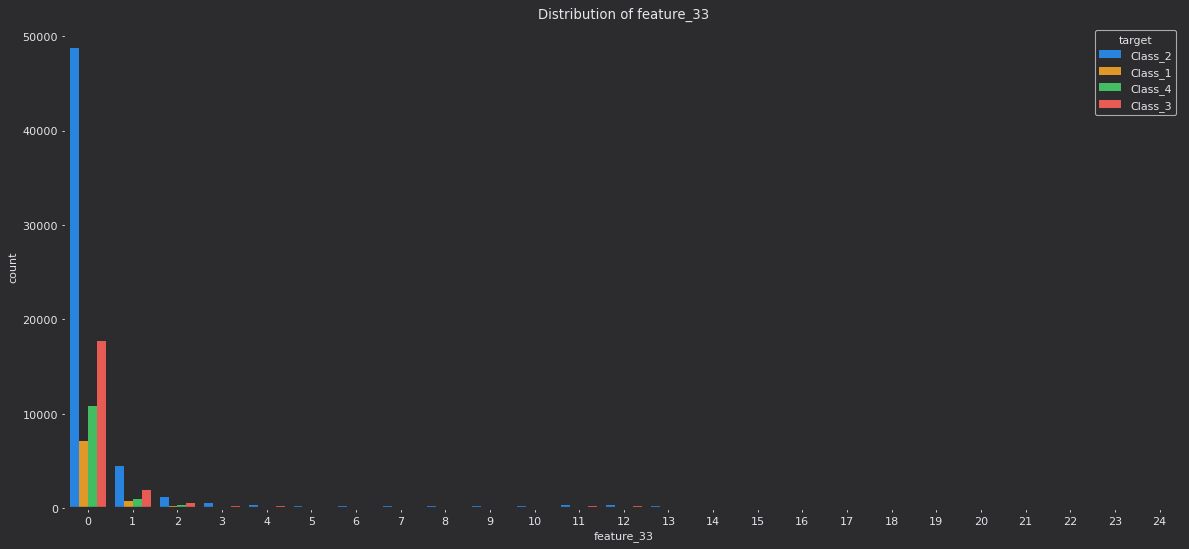

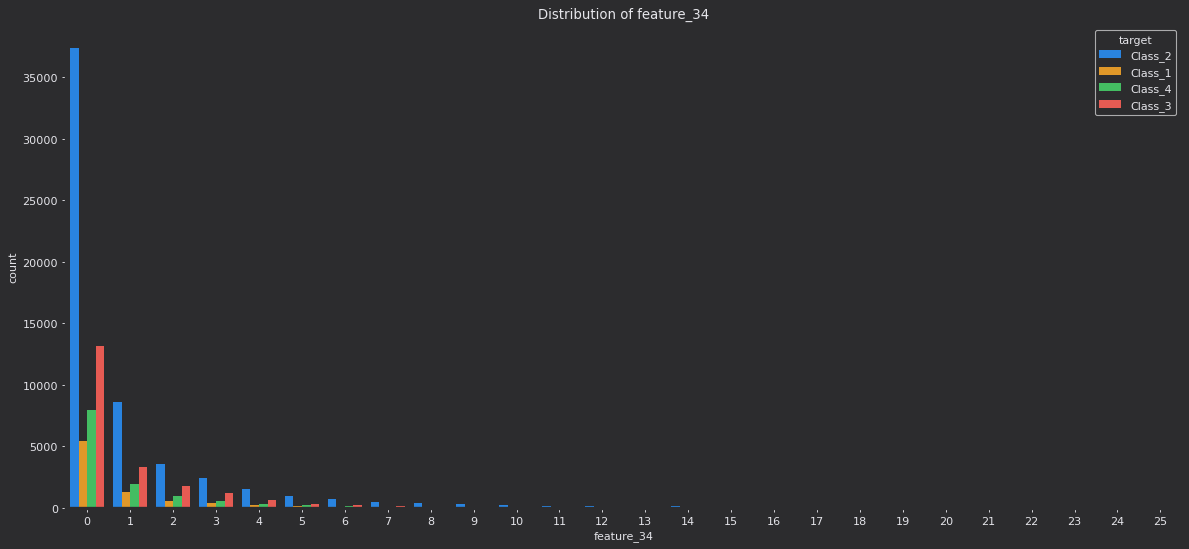

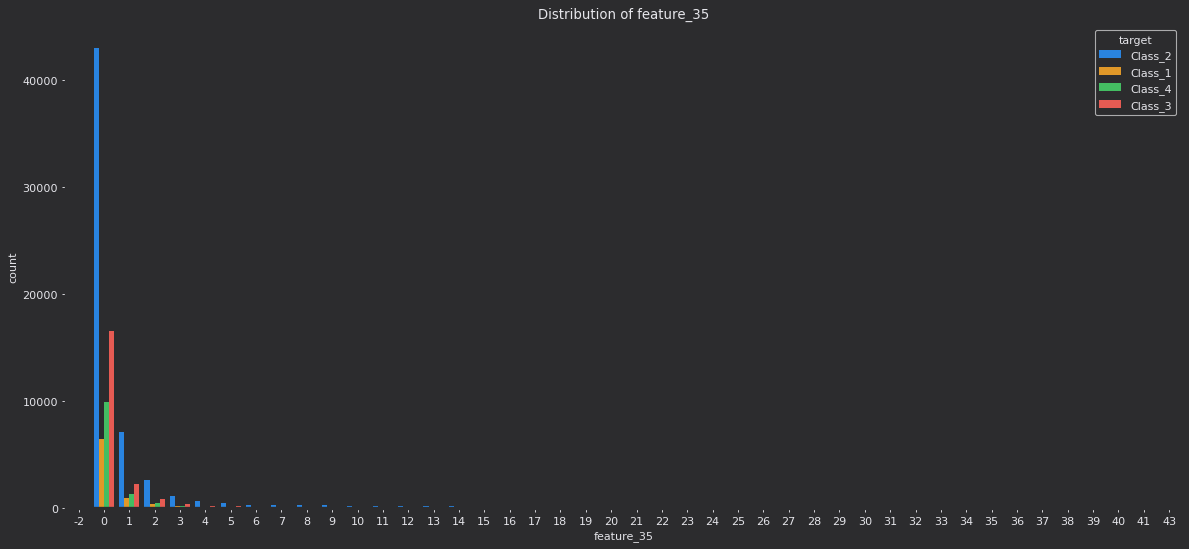

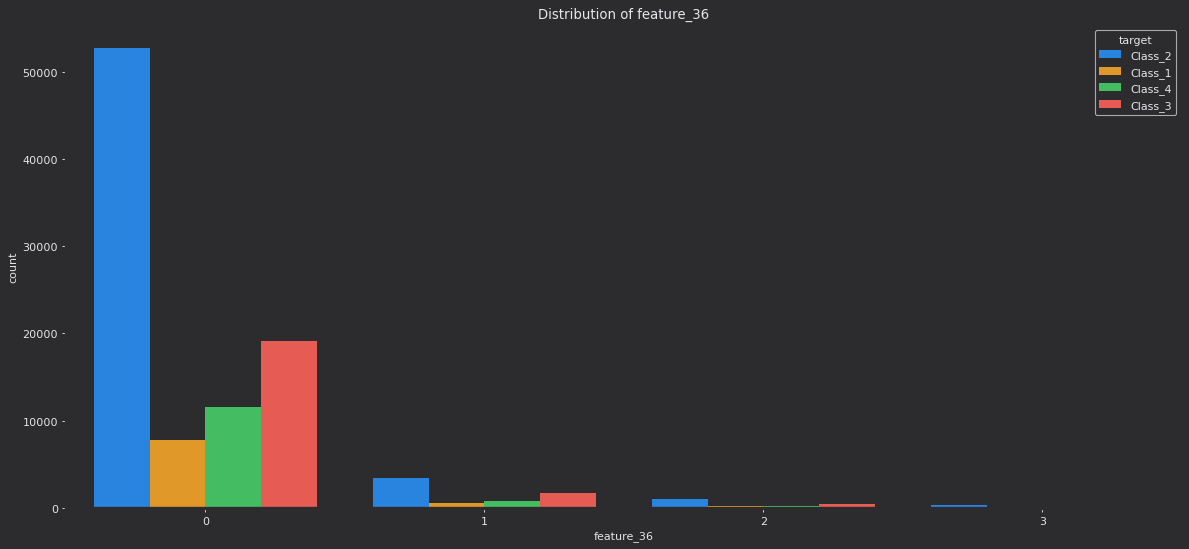

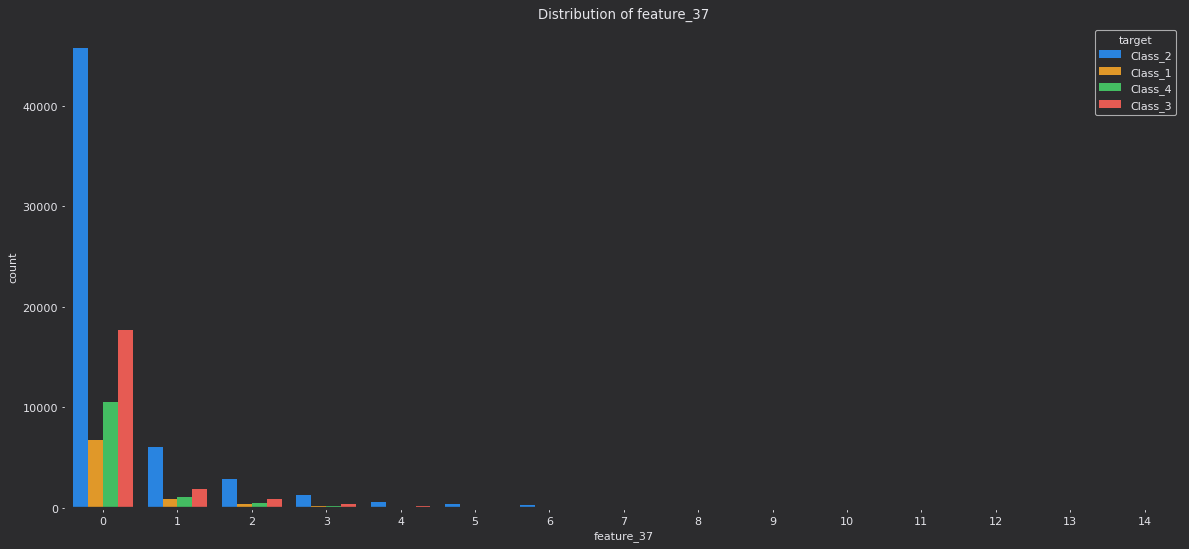

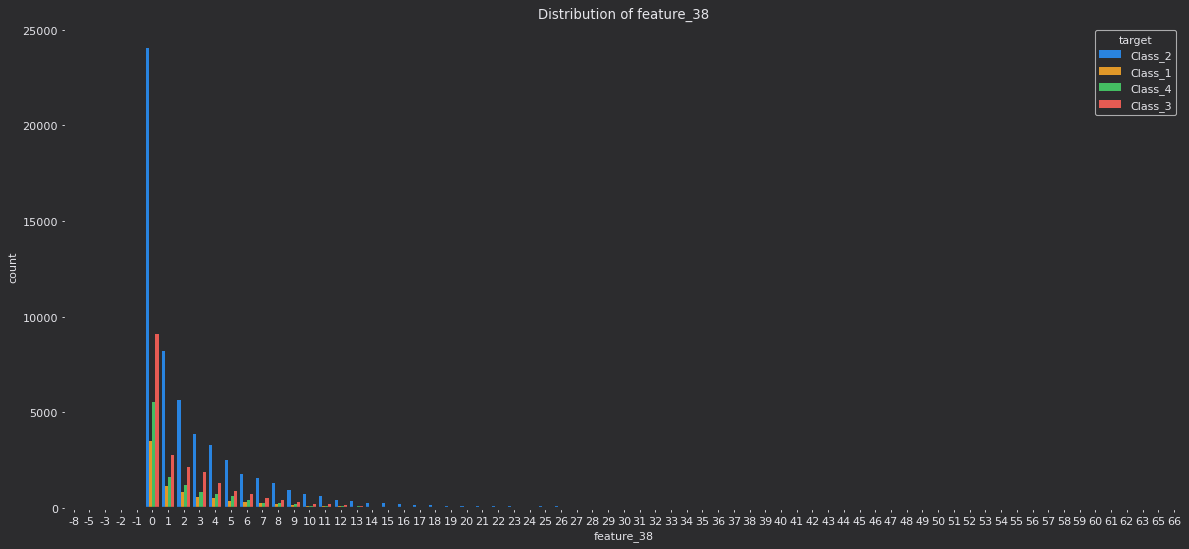

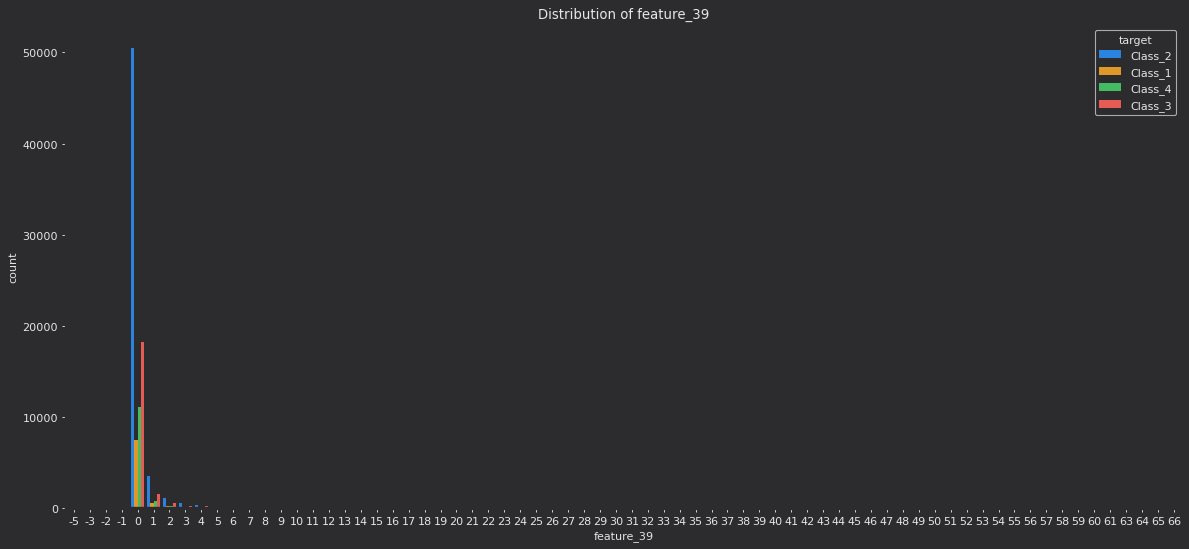

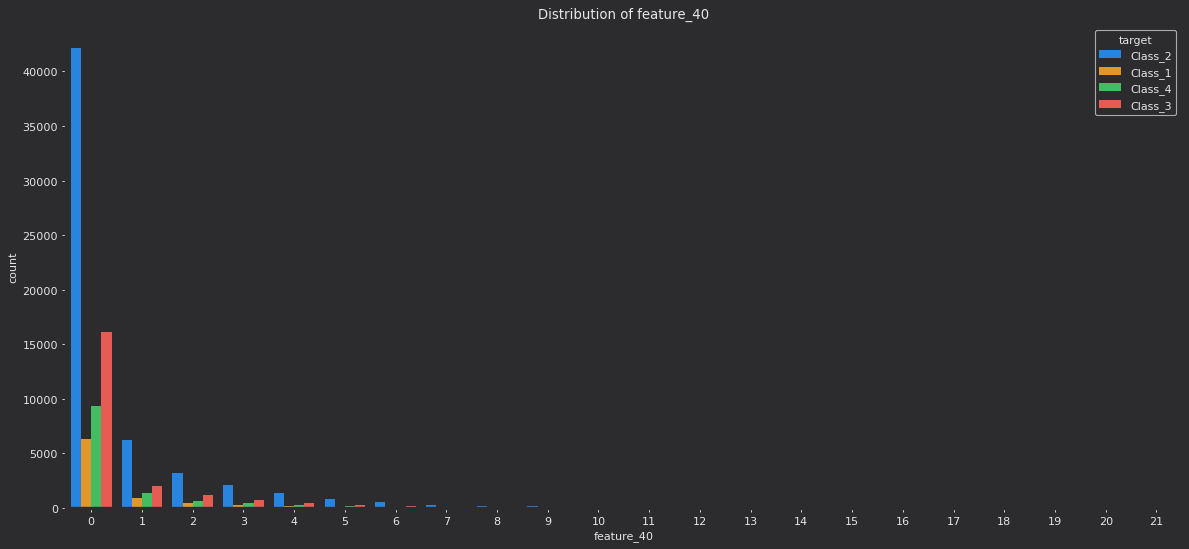

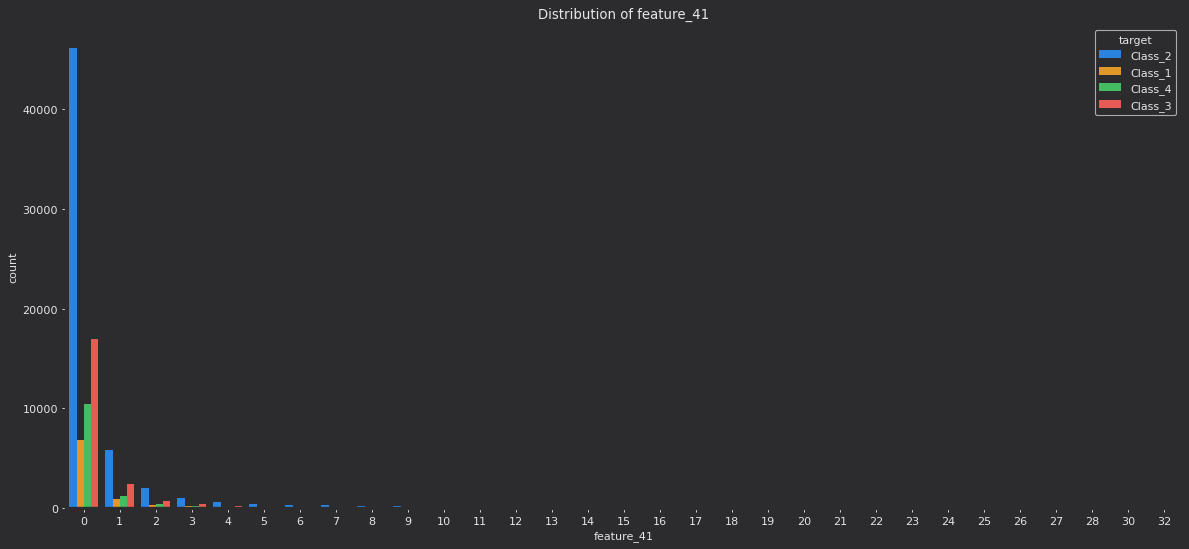

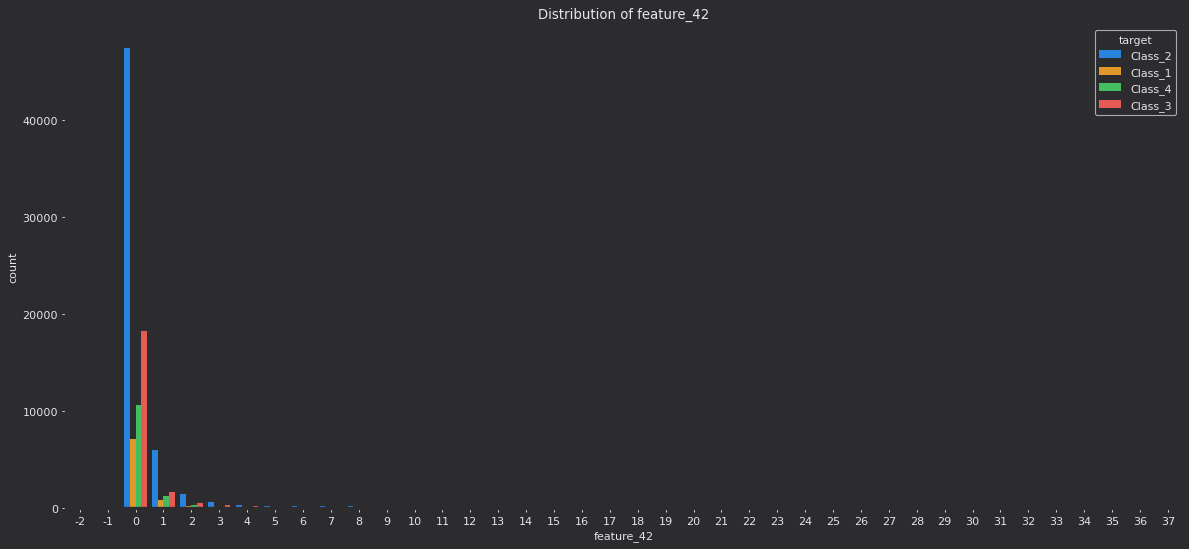

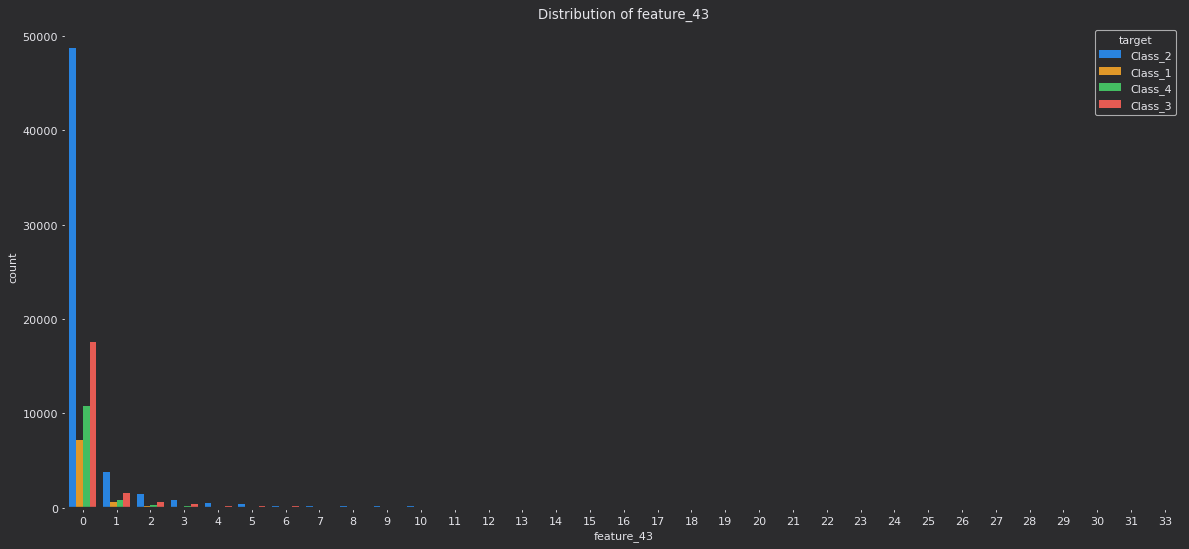

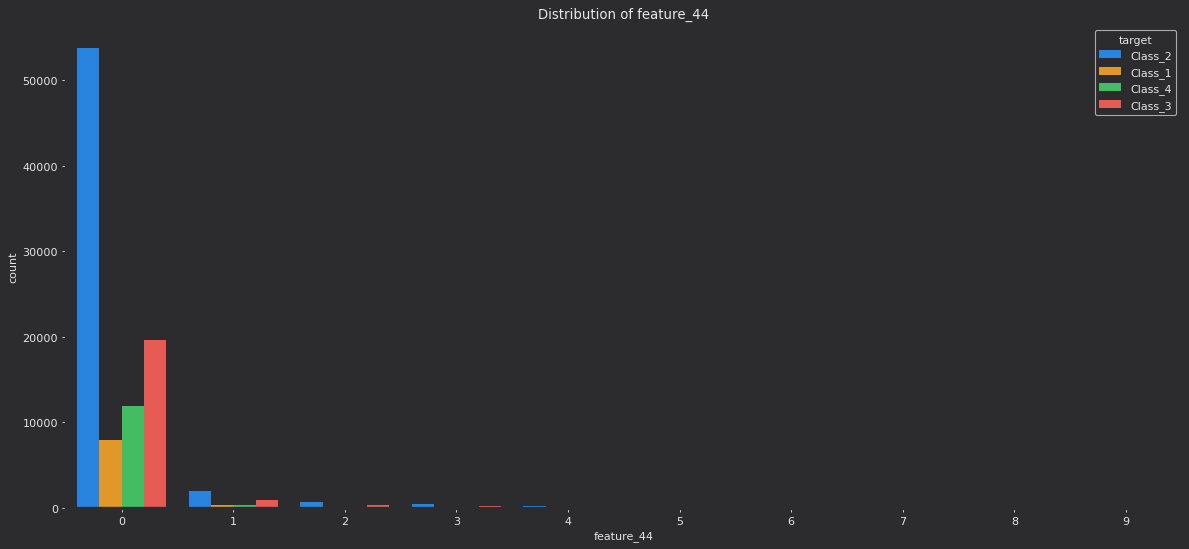

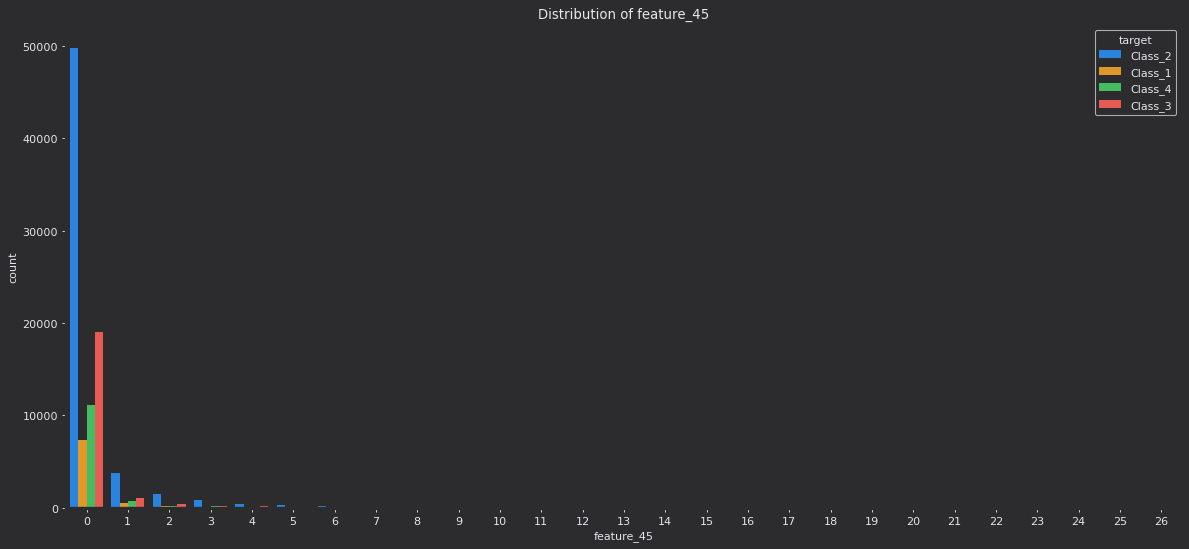

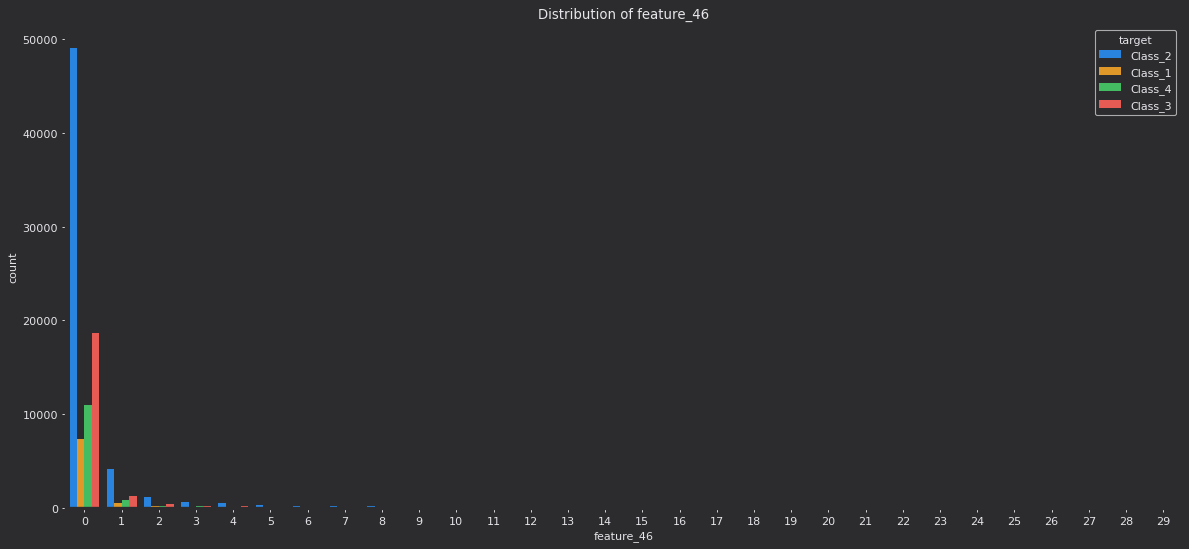

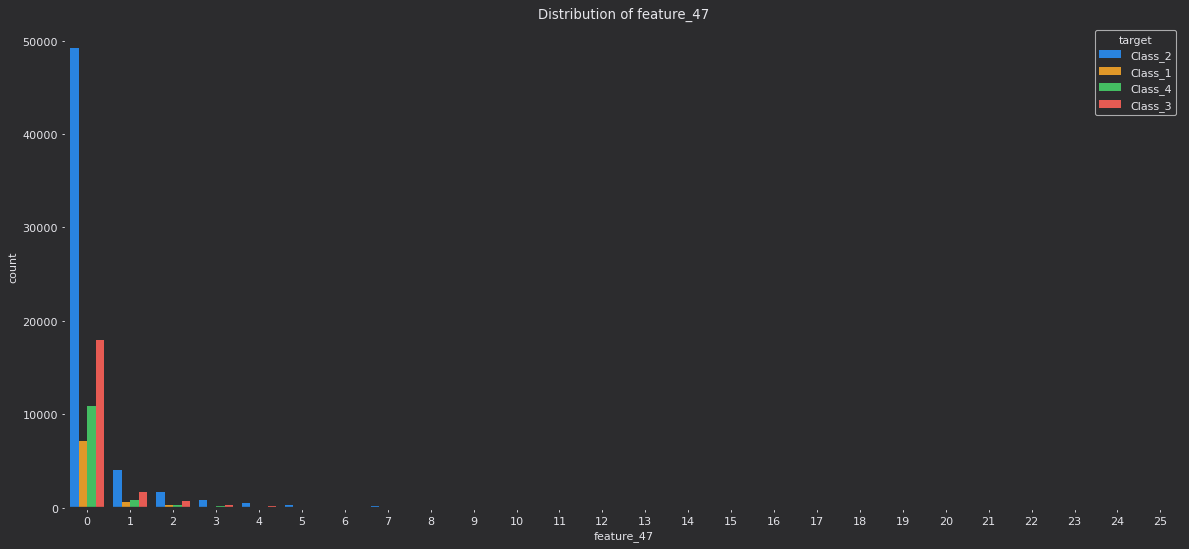

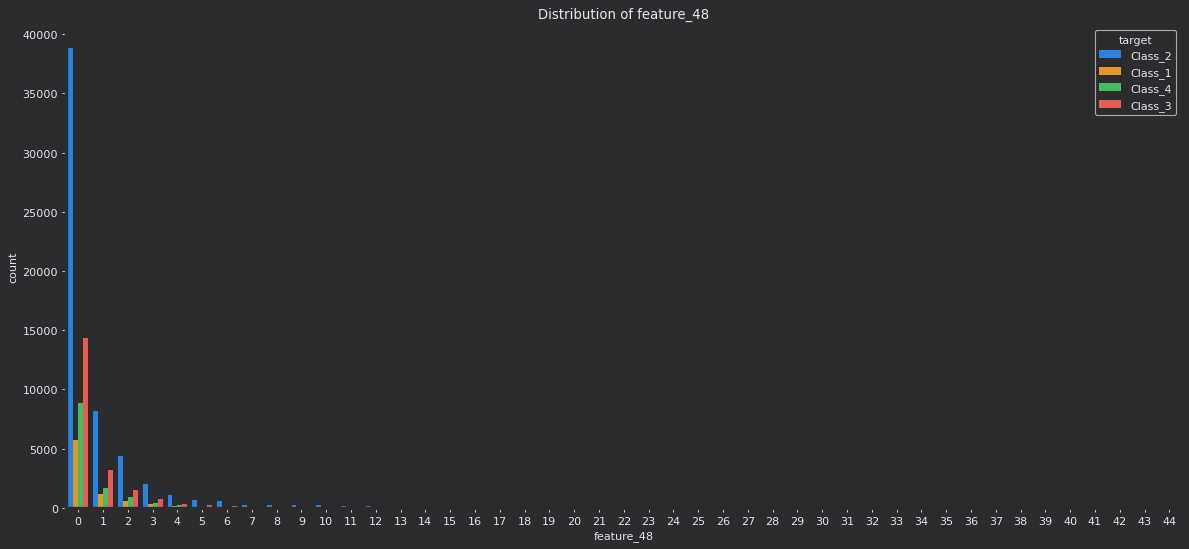

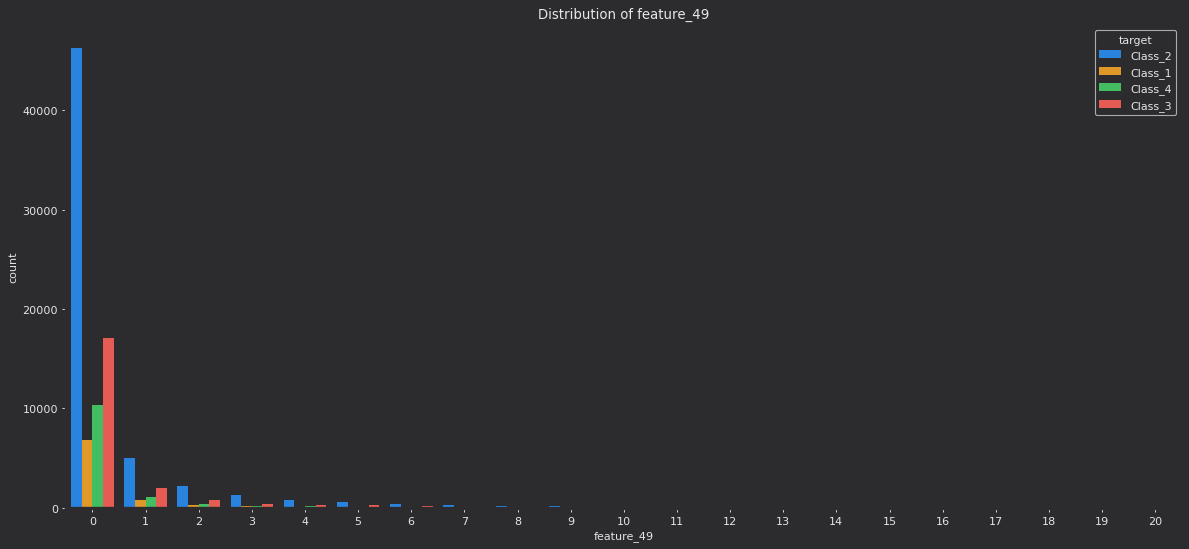

In [26]:
def plot_count(x):
    plt.figure(figsize=(18,8),dpi=80)
    plt.rcParams['axes.linewidth']=3
    fig=sns.countplot(x=x,hue='target',data=train)
    plt.legend(loc='upper right',title='target')
    plt.title(f'Distribution of {x}')
    plt.show()

for col in train.columns[:-1]:
    plot_count(col)

## Observation
As can be seen from the above plots most of the instances belong to class 2. Might need to use some balancing technique.  
Another interesting observation is that even in features which have a lot of unique values like (38,39,48) most of the observations are left skewed. And since the original dataset was used to predict categories of e-commerce products these features might be something linear like price of the product or something else?. Thus the number of proucts with a high price is less. These features could also be something complete different.
But this leads to another inference, since all the classes are left skewed and not just one, if our previous inference about this data is true then the classes might not depend that much on price or whatever these features represent.

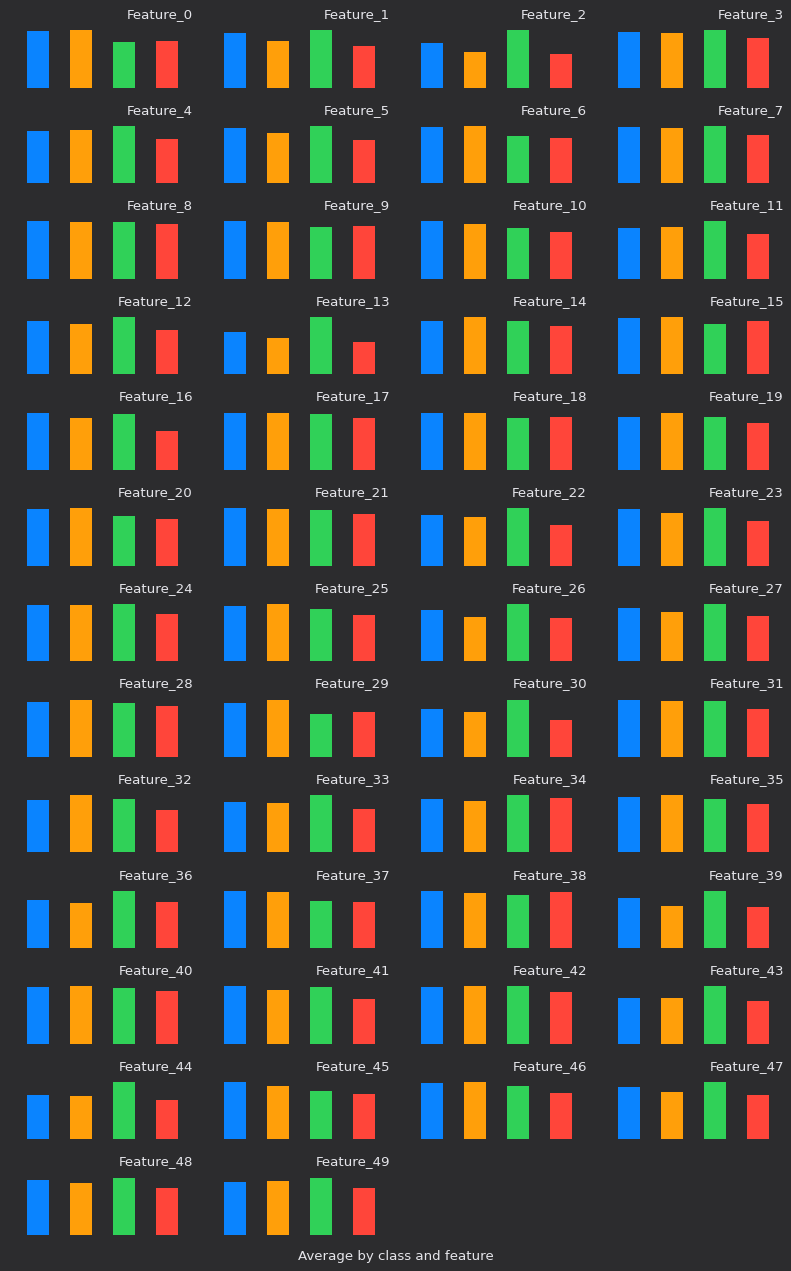

In [12]:
fig,axes=plt.subplots(13,4,figsize=(10,16),dpi=80)
mean=train.groupby('target').mean().sort_index()
std=train.groupby('target').std().sort_index()

for i,ax in zip(range(50),axes.flatten()):
    ax.bar(mean[f'feature_{i}'].index,mean[f'feature_{i}'],width=0.5,color=dark_palette[:4])
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel=''
    ax.set_ylabel=''
    ax.margins(0.1)
    ax.set_title(f'Feature_{i}',loc='right')
axes.flatten()[-1].axis('off')
axes.flatten()[-2].axis('off')
fig.supxlabel('Average by class and feature')
fig.tight_layout()
plt.show()

From the above plot it can be infered that at the higher categorical values the classes except 2 have more instances since the average is comparable even though class 2 has a lot more instances.

In [23]:
le=LabelEncoder()
encoding=le.fit_transform(train.target)
le_train=train.copy()
le_train=le_train.assign(target=encoding)

<AxesSubplot:>

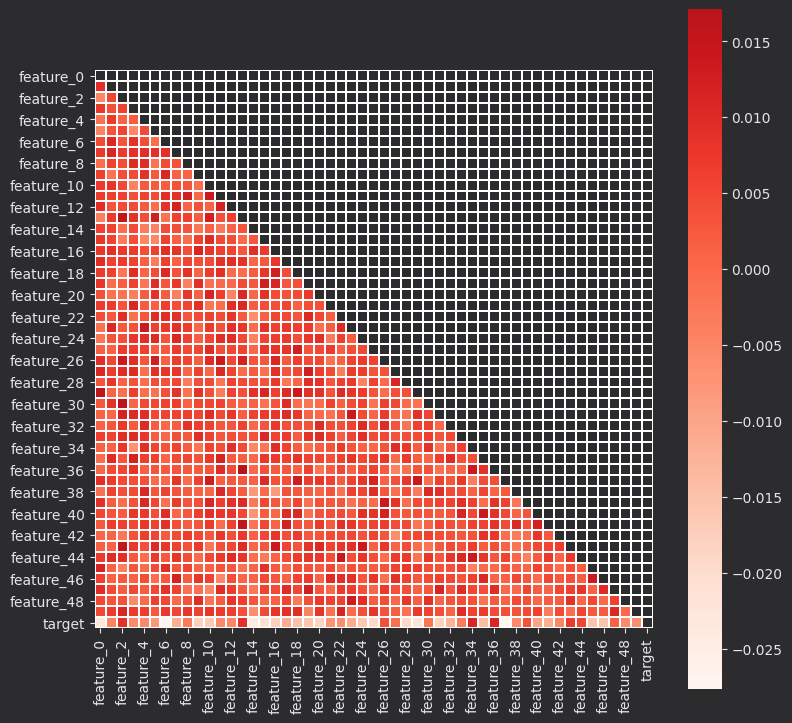

In [26]:
corr=le_train.corr()
fig,ax=plt.subplots(figsize=(9,9),dpi=100)
mask=np.zeros_like(corr,dtype=bool)
mask[np.triu_indices_from(mask)]=True
sns.heatmap(corr,square=True,center=0,mask=mask,linewidth=0.1,ax=ax,cmap='Reds')

In [22]:
train.head()

feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
0          0          0          1          0          1          0   
1          0          0          0          0          2          1   
2          0          0          0          0          0          0   
3          0          0          0          0          0          0   
4          0          0          0          0          0          0   

   feature_6  feature_7  feature_8  feature_9  ...  feature_41  feature_42  \
0          0          0          0          0  ...           0           0   
1          0          0          0          0  ...           0           0   
2          0          0          0          2  ...           0           1   
3          0          3          0          0  ...           0           0   
4          0          0          0          0  ...           0           0   

   feature_43  feature_44  feature_45  feature_46  feature_47  feature_48  \
0          21           0           0           0           0           0   
1           0           0           0           0           0           0   
2           0           0           0           0          13           2   
3           0           0           0           0           0           1   
4           0           0           0           0           0           1   

   feature_49   target  
0           0  Class_2  
1           0  Class_1  
2           0  Class_1  
3           0  Class_4  
4           0  Class_2  

[5 rows x 51 columns]

As can be seen from the correlation matrix most of the features are not that correlated with each other.